<span style="font-family: 'Nunito Sans';">

## Exercise III: Convolutional and Recurrent Neural Networks

### EXTQ40 Introduction to Artificial Neural Networks and Deep Learning
*Department of Astronomy and Theoretical Physics*  
*Lund University*  
*Fall 2022*

*Author: Joel Bengs*
</span>

---

## Introduction
In this exercise I have: 

* Trained CNNs for a binary classification problem
* Visualized how CNNs interprets the data
* Trained CNNs for two 3-class classification problem
* Trained a RNN on a time series prediction problem
* Visualized RNN hidden node activities

In this lab I have looked at network architectures that are designed to handle specific kinds of data, namely Convolutional Neural Networks for image processing and Recurrent Neural Networks for time series processing

## Summary
Through the lab I have applied CNN and RNN basics to successfully solve a set of problems. 

The vizualisation of filter outputs in the CNN model provided valuable learnings when the models were small, but became more difficult to interpret when building larger or deeper networks. It was harder to understand how a network worked with spacial relations (the rectangle problem) that to understand when a filter identified a feature (such as a vertical line anywhere).

It is evident that the LSTM and GRU designs outperformed the SimpleRNN in identifiing time-dependent patterns. With truncated BRTT, they are equally fast in training.

A CNN model has a harder time differentiating classes that share major features, such as rectangles or digits that are very similar. It is more difficult to build a RNN model that can learn a target patter if that pattern is more volatile.

## The data
Digits "5" and "6" from the MNIST database used for a binary classification problem.

A dataset consisting of circles, rectangles or triangles, that can be read using the *loadImagesCRT* function.

A dataset consisting of three different types of rectangles, squares, "horizontal" rectangles and "vertical" rectangles. This data can be read using the *loadImagesR3* function.

A dataset consisting of pairs of times series. The input time series is a train of rectangle pulses, and the output is triangles, i.e. an up-ramp followed by a down-ramp. For more details see the cell *Ex4-1*. The task is to train a recurrent network that predicts the triangle time series from the pulse time series.


## The exercises
As for the previous labs all exercises are found below.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Data | Needed | Loading images for the CNN exercise |
| 3 | PlotImg | Information  | View some of the images |
| 4 | Stats | Needed | Compute classification results |
| 5 | Visualization | Needed | Visualize layers of a CNN |
| 6 | Ex1 | Exercise | For question 1-2 |
| 7 | Ex2 | Exercise | For question 3 |
| 8 | Ex3 | Exercise | For question 4-5 |
| 9 | Ex4-1 | Exercise | For question 6-9 |
| 10 | Ex4-2 | Exercise | For question 6-9 |
| 11 | Ex4-3 | Exercise | For question 6-9 |


In order for you to start with the exercise you need to run all cells with the CellType "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun again!

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries
In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".


In [1]:
import numpy as np
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

### CellName: Data (#2)
### CellType: Needed
### Cell instruction: Function for getting images for the CNN exercises

This cell defines the functions that obtain the images needed for the CNN exercise. **Note**: Make sure the "crt-trn/" and "crt-tst/" folders are available in the same directory as this notebook file when you actually call these functions. Otherwise, the files files are not found.

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def load_pics(folder,N):
    import imageio
    imgs = []
    for i in range(N):
        img = imageio.imread(folder+"img_{:05}.png".format(i+1))
        ch = img[:,:,0]
        imgs.append(ch)
    return np.array(imgs)

def load_labels(fn):
    return np.loadtxt(fn, usecols=(0,1,2))

def loadImagesCRT():
    base = "./"
    trainpic = load_pics(base + "crt-trn/", 500)
    valpic = load_pics(base + "crt-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"crt-trn_trg.csv")
    #ytrain = ytrain[:N]
    yval = load_labels(base+"crt-val_trg.csv")
    
    return xtrain, ytrain, xval, yval, width, height

def loadImagesR3():
    base = "./"
    trainpic = load_pics(base + "r3-trn/", 500)
    valpic = load_pics(base + "r3-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"r3-trn_trg.csv")
    #ytrain = ytrain[:500]
    yval = load_labels(base+"r3-val_trg.csv")

    return xtrain, ytrain, xval, yval, width, height


def loadMNIST56():
    xtrain, ytrain, xval, yval = np.load("mnist56.npy", allow_pickle=True)
    width, height = xtrain.shape[1:3]
    return xtrain, ytrain, xval, yval, width, height


### CellName: PlotImg (#3)
### CellType: Information
### Cell instruction: Show some of the images

Here we look at the first ten pictures in the training set, and their respective targets. You can select the dataset to look at by uncomment the correct line.

Run the cell by entering into the cell and press "CTRL Enter".

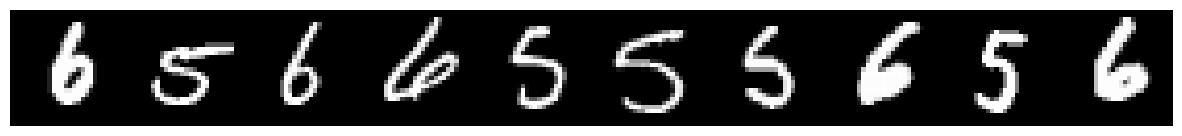

Targets:
[1. 0. 1. 1. 0. 0. 0. 1. 0. 1.]


In [3]:
xTrn, dTrn, xVal, dVal, width, height = loadMNIST56()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesCRT()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesR3()

rndSel = np.random.randint(500, size=10)
plt.figure(1, figsize=(15,10))
plt.imshow(xTrn[rndSel,:,:].swapaxes(0,1).reshape(width,10*height),cmap="gray")
plt.axis("off")
plt.show()

print("Targets:")
print(dTrn[rndSel])


### CellName: Stats (#4)
### CellType: Needed
### Cell instruction: Get binary and 3-class classification results

This cell just defines functions that we can call to compute som performance measures for binary and 3-class classification problems.

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def binary_pred_stats(ytrue, ypred, threshold=0.5):
    one_correct = np.sum((ytrue==1)*(ypred > threshold))
    zero_correct = np.sum((ytrue==0)*(ypred <= threshold))
    sensitivity = one_correct / np.sum(ytrue==1)
    specificity = zero_correct / np.sum(ytrue==0)
    accuracy = (one_correct + zero_correct) / len(ytrue)
    return sensitivity, specificity, accuracy

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)


### CellName: Visualization (#5)
### CellType: Needed
### Cell instruction: Function that can visualize the different layers of a CNN

This cell is feeding an image through a CNN and stores the intemediate values. It plots the different layers (filtered images) either before or after maxpooling.

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def layerVisaliztion(model,
                     indata,
                     target,
                     idx=10,
                     post_pool = False):

    # The prediction for the test case
    #idx_pred = model.predict(indata)[idx,0]
    #print('True label: = {:0.1f}, Prediction = {:0.8f}'.format(idx_pred, target[idx]))
    
    print('Prediction: ', model.predict(indata)[idx])
    print('Target    : ', target[idx])
    
    kind = MaxPooling2D if post_pool else Conv2D
    outs = [l.output for l in model.layers if isinstance(l, kind)]
    intermediate = K.function([model.layers[0].input], outs)
    
    states = [indata[idx:idx+1]] + intermediate([indata[idx:idx+1]])
    plt.figure(figsize=(18,12))                    
    for k,s in enumerate(states):
        plt.figure(figsize=(18,12))
        plt.subplot(len(outs)+1,1,k+1)
        pics = s[0]
        pics = np.rollaxis(pics,2,0)
        rows = 2 if pics.shape[0] > 8 else 1
        cols = pics.shape[0]//rows
        pad = pics.shape[0]-rows*cols
        if pad > 0:
            padding = np.zeros_like(pics, shape=(rows-pad,)+pics.shape[1:])
            pics = np.concatenate([pics, padding])
            cols = cols + 1            
        imgshape = pics.shape[1:]
        pics = pics.reshape((rows,cols)+imgshape)
        pics = pics.swapaxes(1,2)
        pics = pics.reshape((pics.shape[0]*pics.shape[1], pics.shape[2]*pics.shape[3]))
        extent = (0,cols*imgshape[0], 0,rows*imgshape[1])
        plt.imshow(pics,cmap='gray',extent=extent)
        for r in range(1,rows):
            plt.plot([0,cols*imgshape[0]], [r*imgshape[1], r*imgshape[1]], color='r', linestyle='-', linewidth=1)
        for c in range(1,cols):
            plt.plot([c*imgshape[0], c*imgshape[0]], [0,rows*imgshape[1]], color='r', linestyle='-', linewidth=1)


### CellName: Ex1 (#6)
### CellType: Exercise
### Cell instruction: Instructions for question 1-2

## CNN for image classification

In this first exercise you are going to train a CNN that can separate between numbers "5" and "6" from the mnist dataset (mnist56 dataset). We are going to use 2000 training images and 1850 validation images. To start with we have a proposed CNN that can solve this problem. It consists of the following:
* First convolutional layer consisting of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Second convolutional layer of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Special layer *Flatten()*, just transforms the all of the max pooled filter outputs to a linear vector of outputs
* *Dense* layer, meaning a fully connected MLP layer, to 10 hidden nodes, again ReLU activation
* Final output layer consisting of one single output node with sigmoid activation function because we have a binary classification problem.

The default is to use *stride* = 1 and no *padding*. 

#### Question 1
Make sure you understand the definition of the CNN model in the cell below and train it. **What is your validation set performance in terms of the accuracy?**

#### Question 2
This image classification problem should be relatively easy since a "5" has some distinct differences from a "6". Experiment with the architecture of the CNN model and try to make it smaller (in terms of the number of trainable parameters), but with the same almost perfect validation accuracy (>98%). **How many parameters do you have in your trimmed model? What is your architecture?**

**Hint:** There is of course very many ways you can make a smaller architecture. You do not need to test all of them!


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

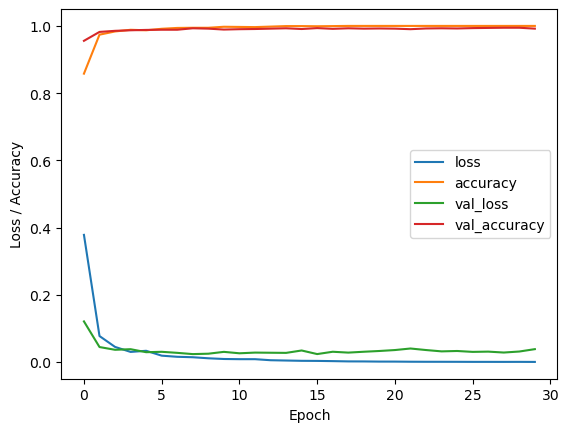

63/63 [==============================] - 0s 2ms/step
training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 

58/58 [==============================] - 0s 2ms/step
validation: Accuracy = 0.9919, Sensitivity = 0.9864, Specificity = 0.9978 



In [10]:
#Q1 - given code
# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex1.add(Flatten())
ex1.add(Dense(10, activation='relu'))

# Output layer
ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.005)
ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex1.summary()

# Now train the ex1
estimator_ex1 = ex1.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=0)


# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Get the training predictions and results for those
d_trn_pred = ex1.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex1.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

(28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 3)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 3)         84        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 3)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 75)                0         
                                                                 
 dense_2 (Dense)             (None, 3)    

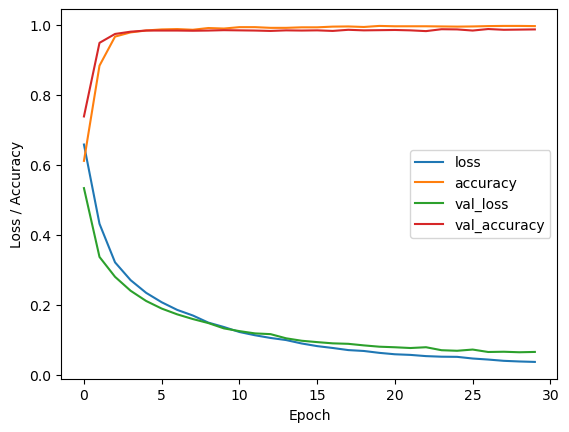

63/63 [==============================] - 0s 3ms/step
training: Accuracy = 0.9980, Sensitivity = 0.9980, Specificity = 0.9980 

58/58 [==============================] - 0s 3ms/step
validation: Accuracy = 0.9870, Sensitivity = 0.9916, Specificity = 0.9821 



In [7]:
#Q2 - reduce model size with maintaned validation accuracy

# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)
print(input_shape)

# Define the CNN ex1
ex2 = Sequential()

# First conv layer
ex2.add(Conv2D(3, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex2.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex2.add(Conv2D(3, kernel_size=(3, 3), activation='relu'))
ex2.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex2.add(Flatten())
ex2.add(Dense(3, activation='relu'))

# Output layer
ex2.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.005)
ex2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex2.summary()

# Now train the ex1
estimator_ex2 = ex2.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=0)


# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex2.history.keys():
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Get the training predictions and results for those
d_trn_pred = ex2.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex2.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

### CellName: Ex2 (#7)
### CellType: Exercise
### Cell instruction: Instructions for question 3

You are now going to take a look into the CNN model. There are many attempts to visualize how the CNN model is making classifications. We will here just look at the different layer outputs given an input image. The function 'layerVisualization', found in cell #5 does the following:
* Use one selected image from the supplied dataset.
* Make a forward pass through the CNN remembering all intermediate values.
* Plot all of the "filters" for each of the layers.
* One can select to plot before or after the MaxPooling.

You pass the model that you want to visualize to the 'layerVisualization' function. If you do not change the names in cell (Ex1) it will be 'ex1'.

#### Question 3
Train a CNN for the "5" vs "6" problem! As a suggestion use the following CNN

*3x(3x3 kernel)-maxpool-3x(3x3 kernel)-maxpool-(Flatten)-Dense(5)-Dense(1)*

Make sure that your trained model gives good validation results (i.e. > 95% accuracy). Having such a model, you can run the cell below. There are two parameters you need to specify, *idx* and *post_pool*. The *post_pool* variable can be set to *True* meaning that filters will be shown after MaxPooling. The image to show is selected by the *idx* variable. As an example, the following values represent,
* idx=1 number "6"
* idx=2 number "5"
* idx=3 another number "6"
* idx=5 antoher number "5"

**Can you find and describe some property in the filters that makes sense when it comes to separating "5" from "6"?**

Hint! If you repeat the training you most likely get a new network and other filters!


58/58 [==============================] - 0s 3ms/step
Prediction:  [0.99963844]
Target    :  1.0
58/58 [==============================] - 0s 3ms/step
Prediction:  [0.05357397]
Target    :  0.0
58/58 [==============================] - 0s 3ms/step
Prediction:  [0.9995263]
Target    :  1.0
58/58 [==============================] - 0s 3ms/step
Prediction:  [0.05357397]
Target    :  0.0


<Figure size 1800x1200 with 0 Axes>

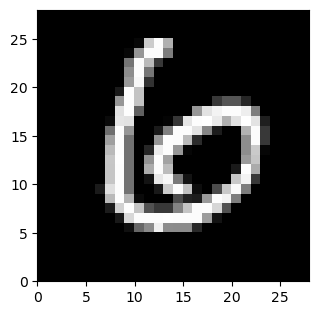

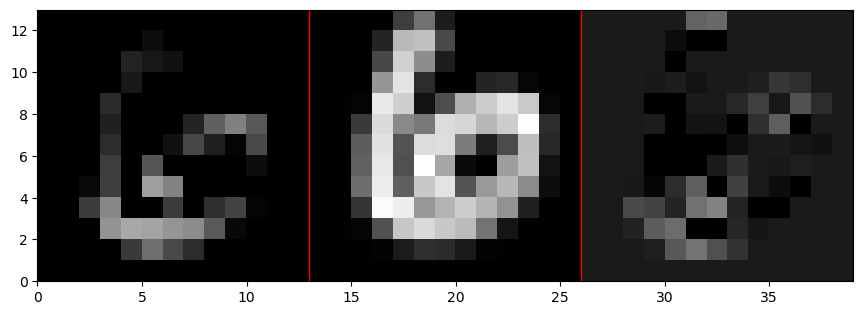

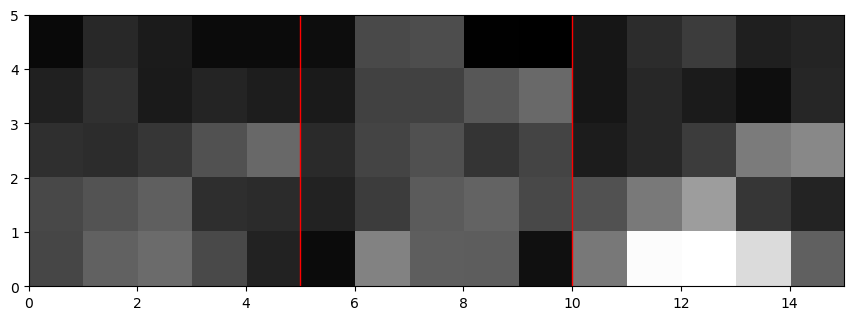

<Figure size 1800x1200 with 0 Axes>

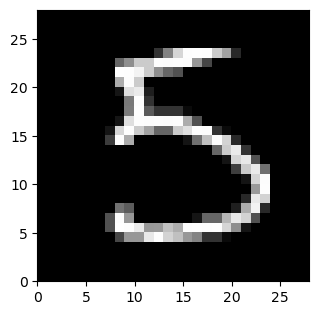

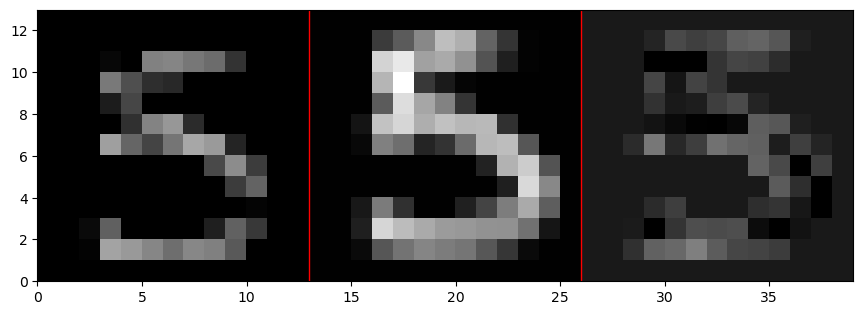

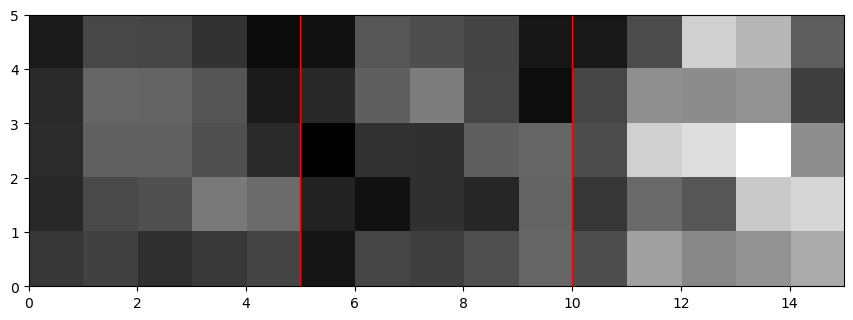

<Figure size 1800x1200 with 0 Axes>

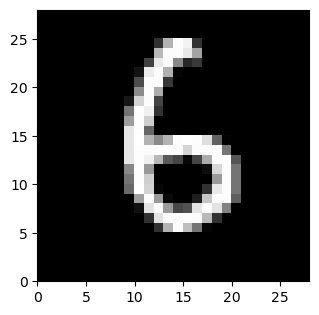

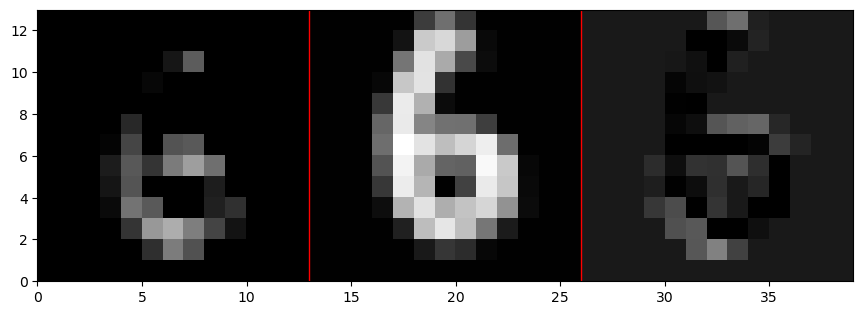

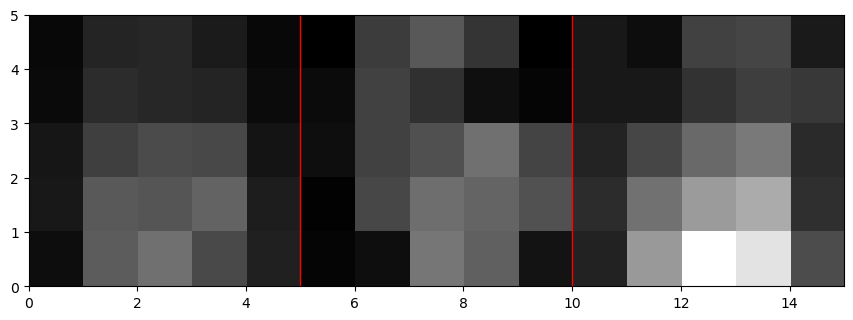

<Figure size 1800x1200 with 0 Axes>

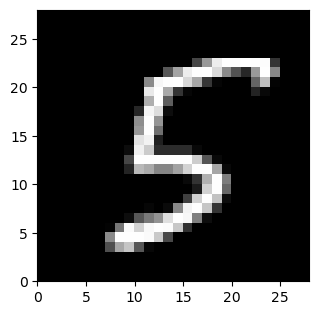

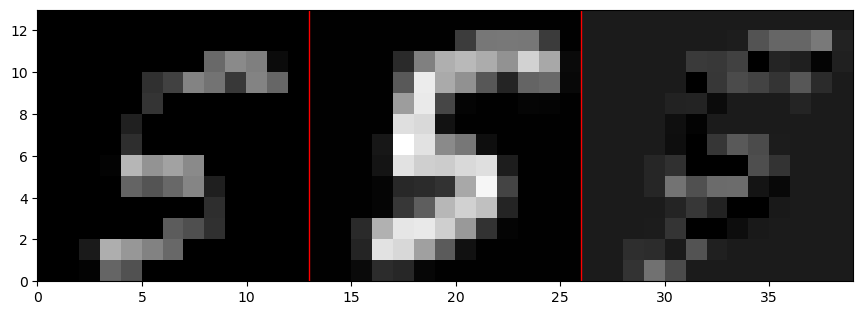

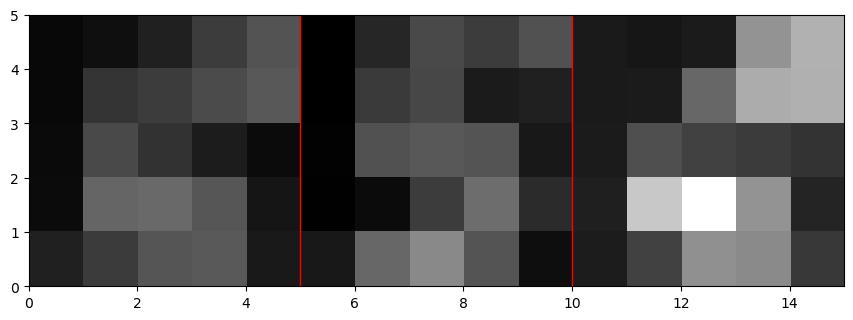

In [12]:
# Show before or after MaxPooling
post_pool = True

# The test image to look at
idx = 1

# Call the visualization method, giving the model and the validation data to select the case from
layerVisaliztion(ex2, x_val, d_val, idx, post_pool)
layerVisaliztion(ex2, x_val, d_val, 2, post_pool)
layerVisaliztion(ex2, x_val, d_val, 3, post_pool)
layerVisaliztion(ex2, x_val, d_val, 5, post_pool)

### CellName: Ex3 (#8)
### CellType: Exercise
### Cell instruction: Instructions for question 4-5

## CNN for image classification

In this exercise you are going to train a CNN that can separate between circles/squares/triangles found in the CRT dataset, and the three different types of rectangles found in the R3 dataset. You will use 500 training images and 1000 validation images. Code is provided for loading the data, training the model and presenting the result. Your task is to define the actual CNN model and see how it performs. For the following two questions you can optimize the model based on the validation performance. Here we assume that 1000 validation images are many enough for "model selection overtraining bias" to be small.

#### Question 4
Define your own CNN model for classifying the images in the CRT data into three classes. **Provide the details of your CNN model and present the validation result.**

**Hint:** Remember the difference between a binary classifier and a multi-class classifier!
1

#### Question 5
Define your own CNN model for classifying the images in the R3 data into three classes. **Provide the details of your CNN model and present the validation result.** **Why is this a more difficult problem than Question 4?**

#### Bonus task 
The bonus tasks are provided if you have extra time and want to continue to explore the CNNs. **These tasks are not required for the course and does not influence any grading**. 

You can use the *layerVisualization* method also for above models (Q4 and Q5). It will show you the different filter outputs. Again try to understand the features the different filter learn to separate between circles-triangles-rectangles, or the rectangles for the R3 data set.

In [69]:
# Load the CRT dataset (Question 4)
x_trn, d_trn, x_val, d_val, width, height = loadImagesCRT()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex3
ex3 = Sequential()

#Add Architecture: 3 filters + maxpool + 3 filters + maxpool + flatten + MLP
ex3.add(Conv2D(4, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(3,3)))
ex3.add(Conv2D(4, kernel_size=(3,3), strides=(1,1), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2,2)))
ex3.add(Flatten())
ex3.add(Dense(5, activation='relu'))
ex3.add(Dense(3, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.003)
ex3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3.summary()

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')

C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """


Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 4)         40        
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 10, 10, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 4)           148       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 2, 2, 4)          0         
 g2D)                                                            
                                                                 
 flatten_19 (

KeyboardInterrupt: 

C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """


Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 4)         104       
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 15, 15, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 13, 13, 4)         148       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 6, 6, 4)          0         
 g2D)                                                            
                                                                 
 flatten_29 (

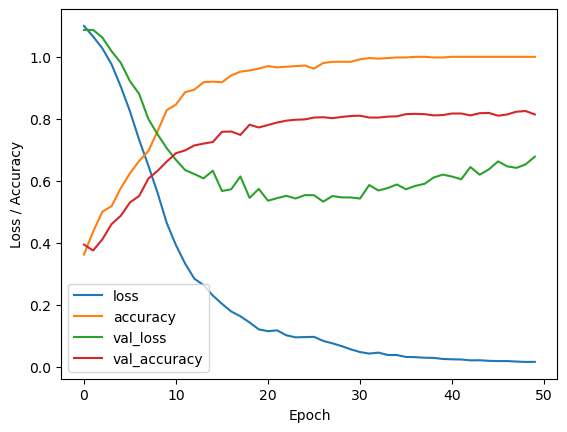

Training  log_loss:   0.6583741557002067
Training  accuracy:   0.996 



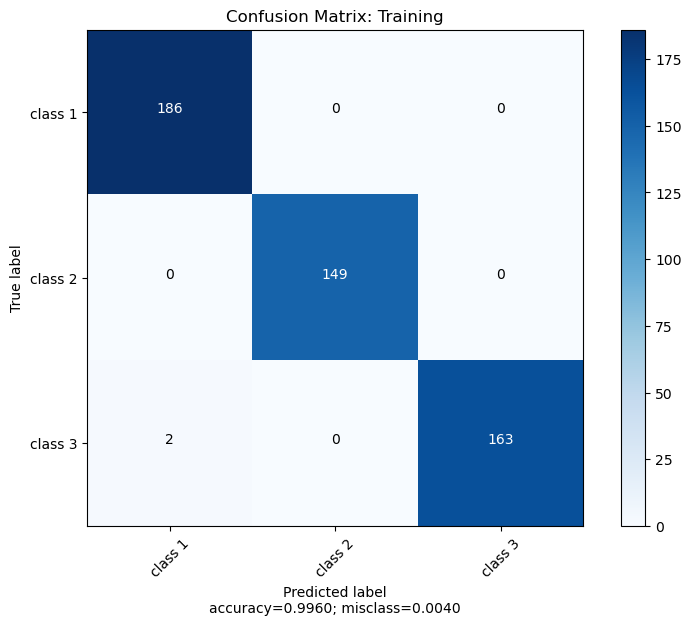

Validation  log_loss:   0.7398596766367554
Validation  accuracy:   0.806 



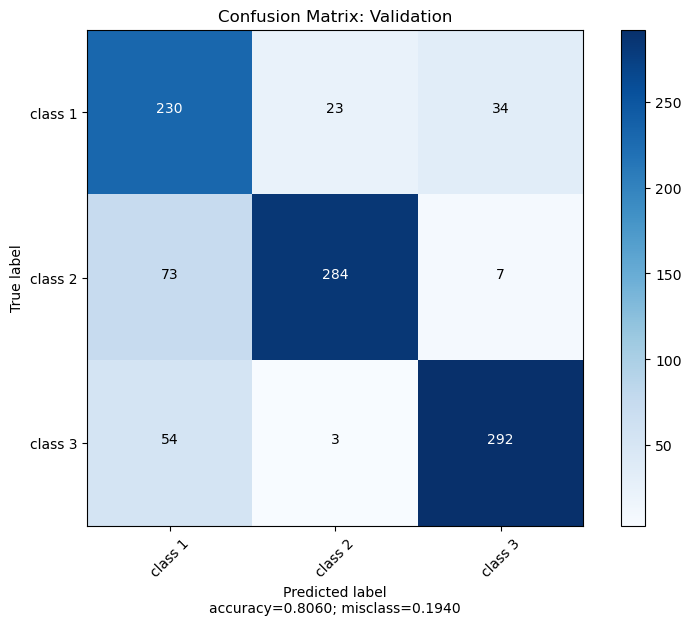

In [85]:
# Load the R3 dataset (QUESTION 5)
x_trn, d_trn, x_val, d_val, width, height = loadImagesR3()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex3
ex3 = Sequential()

#Add Architecture: 3 filters + maxpool + 3 filters + maxpool + flatten + MLP
ex3.add(Conv2D(4, kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
ex3.add(Conv2D(4, kernel_size=(3,3), strides=(1,1), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2,2)))
ex3.add(Flatten())
ex3.add(Dense(10, activation='relu'))
ex3.add(Dense(3, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.003)
ex3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3.summary()

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')

32/32 [==============================] - 0s 4ms/step
Prediction:  [0.8344053  0.27827388 0.11448817]
Target    :  [1. 0. 0.]
32/32 [==============================] - 0s 5ms/step
Prediction:  [5.9455365e-01 1.0000000e+00 5.3678047e-13]
Target    :  [0. 1. 0.]
32/32 [==============================] - 0s 5ms/step
Prediction:  [0.9971982  0.00525457 0.9967813 ]
Target    :  [1. 0. 0.]
32/32 [==============================] - 0s 3ms/step
Prediction:  [2.3514429e-02 8.1182823e-02 3.7257755e-07]
Target    :  [0. 1. 0.]
32/32 [==============================] - 0s 3ms/step
Prediction:  [0.853252   0.18880081 0.9323949 ]
Target    :  [0. 1. 0.]
32/32 [==============================] - 0s 4ms/step
Prediction:  [0.99530464 0.03055984 0.04156363]
Target    :  [1. 0. 0.]


C:\Users\Joel Bengs\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 1800x1200 with 0 Axes>

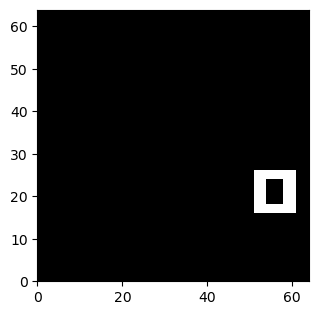

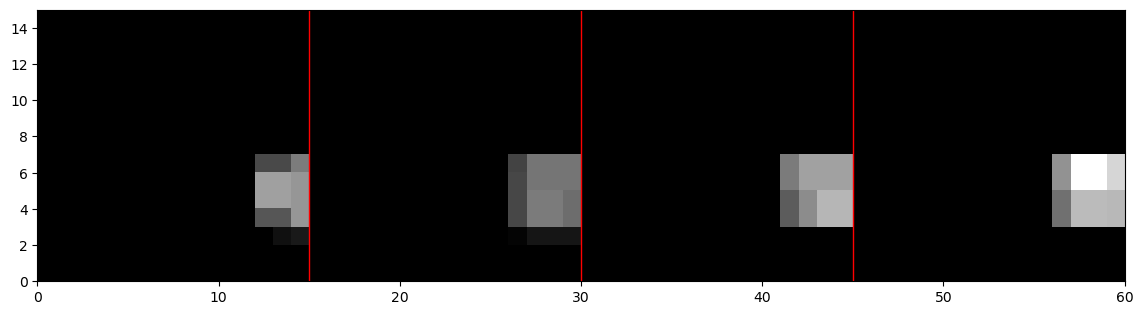

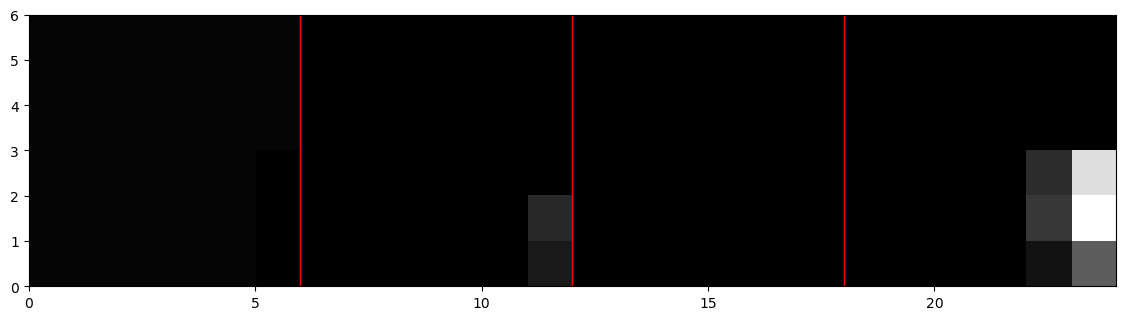

<Figure size 1800x1200 with 0 Axes>

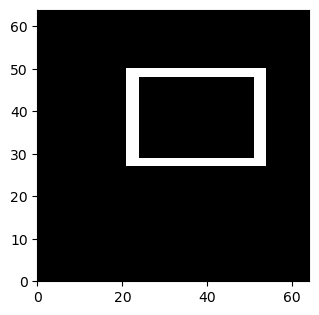

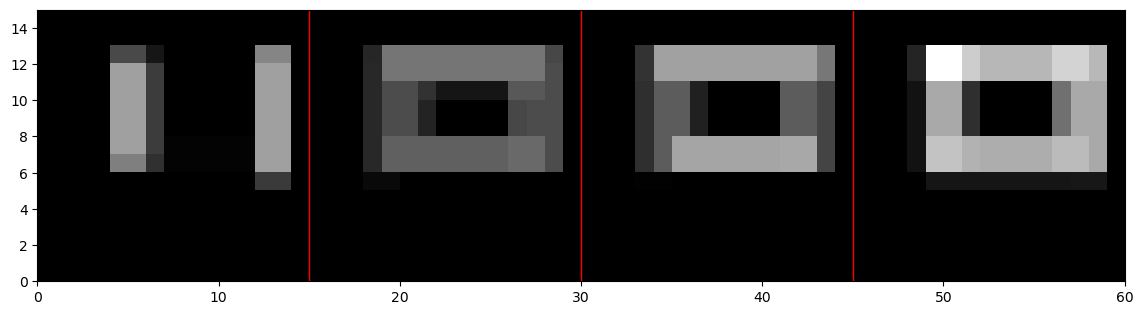

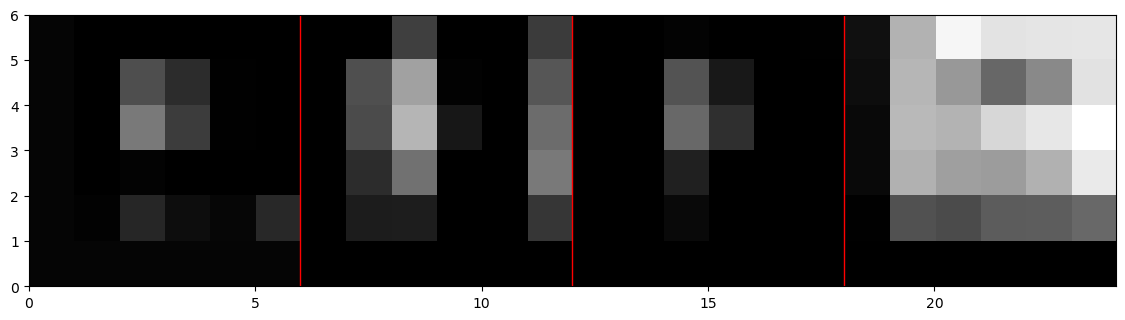

<Figure size 1800x1200 with 0 Axes>

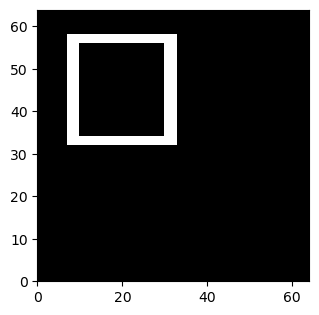

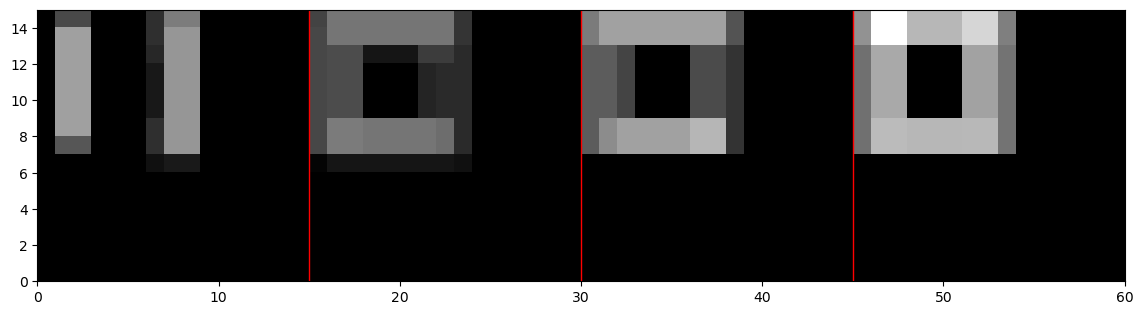

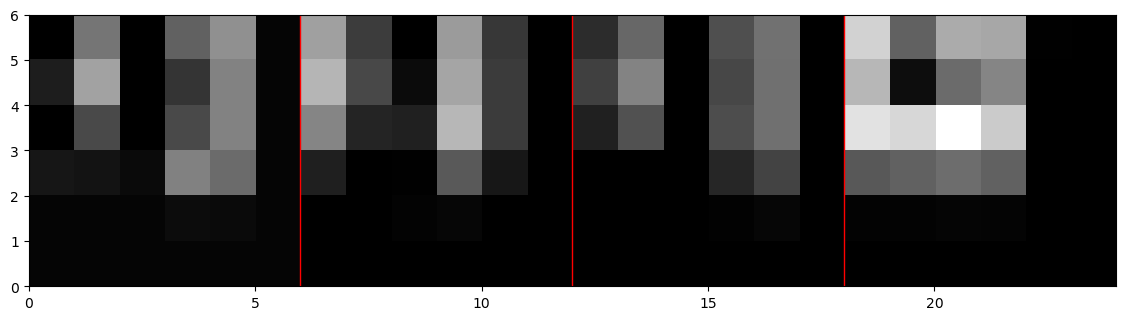

<Figure size 1800x1200 with 0 Axes>

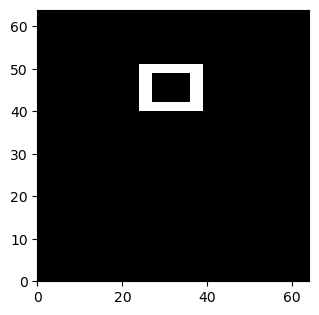

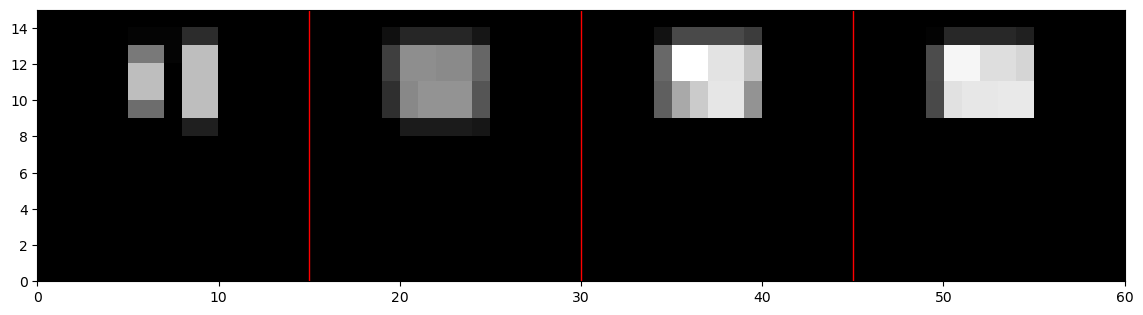

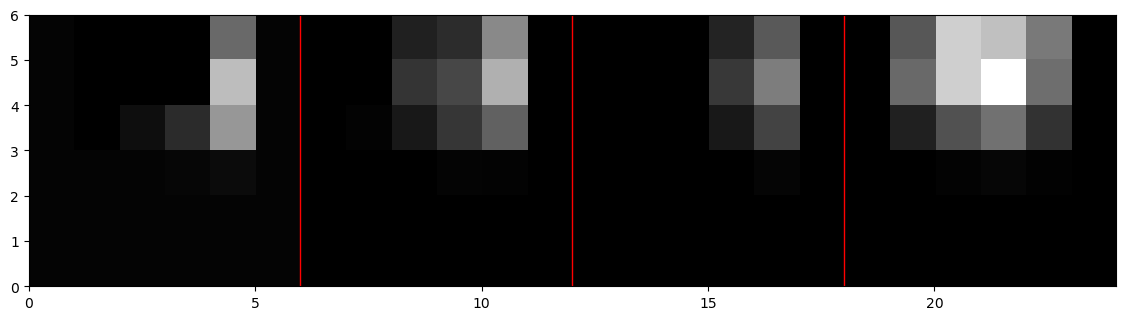

<Figure size 1800x1200 with 0 Axes>

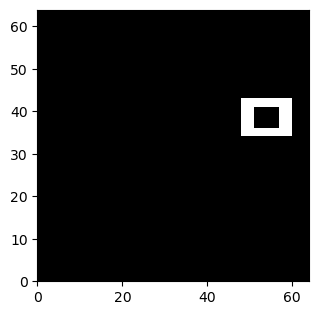

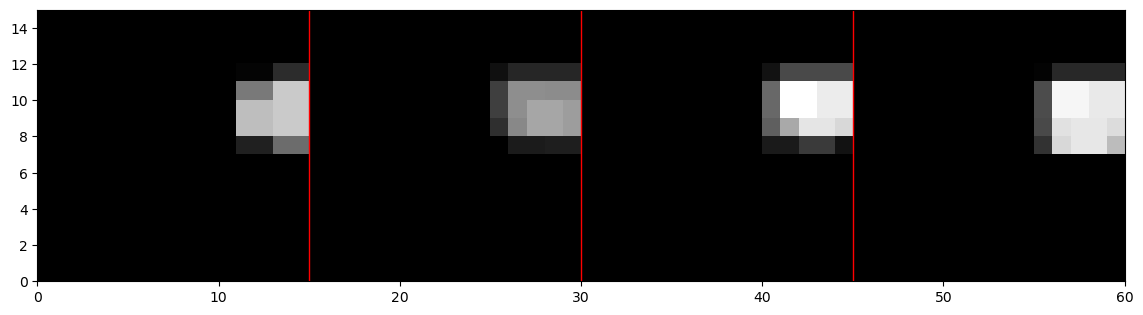

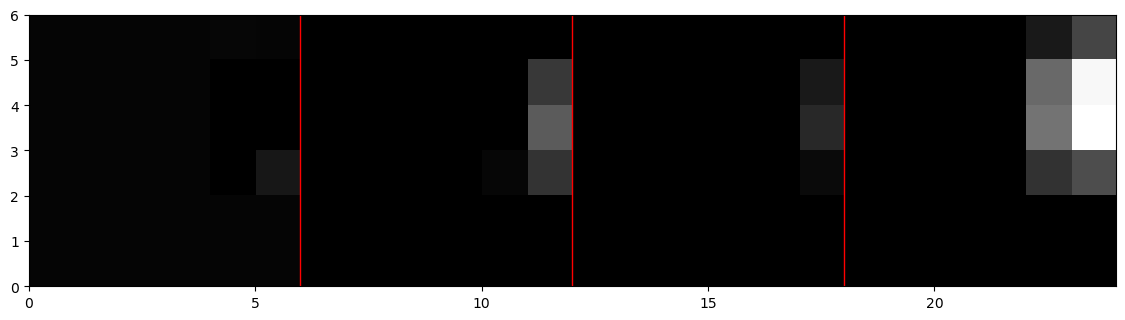

<Figure size 1800x1200 with 0 Axes>

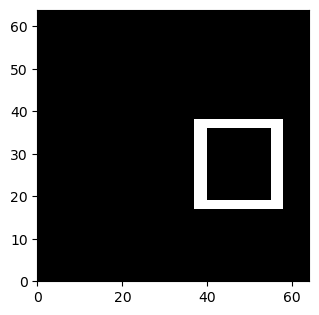

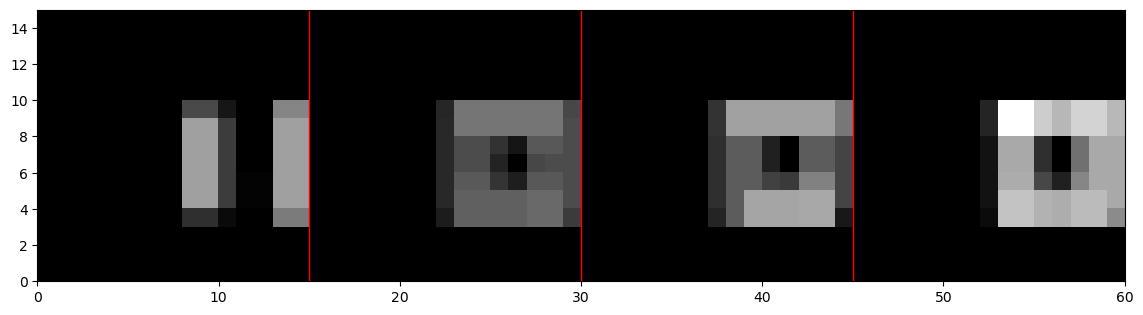

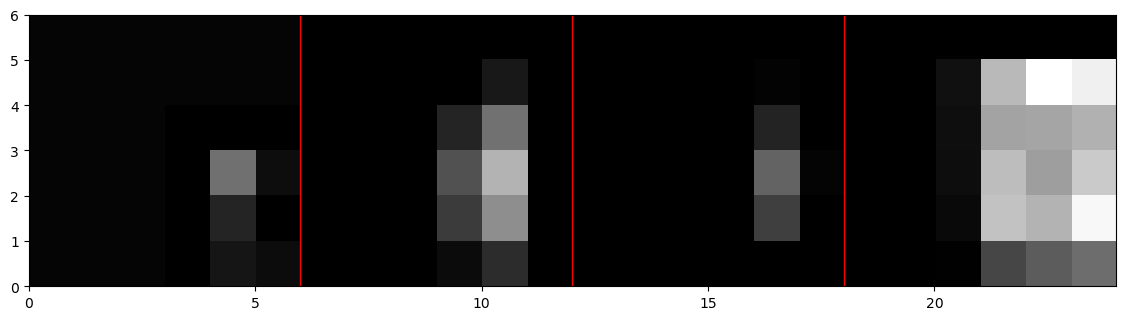

In [83]:
# Show before or after MaxPooling
post_pool = True

# The test image to look at
idx = 3

# Call the visualization method, giving the model and the test data to select the case from
layerVisaliztion(ex3, x_val, d_val, idx, post_pool)
layerVisaliztion(ex3, x_val, d_val, 4, post_pool)
layerVisaliztion(ex3, x_val, d_val, 5, post_pool)
layerVisaliztion(ex3, x_val, d_val, 6, post_pool)
layerVisaliztion(ex3, x_val, d_val, 7, post_pool)
layerVisaliztion(ex3, x_val, d_val, 8, post_pool)

### CellName: Ex4-1 (#9)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
We will now look at recurrent networks! **Note**: This exercise is divided into three cells. The actual questions for this part can be found in cell *Ex4-3* below.

### Loading and visualizing the data
The cell below loads the training data and the validation data from existing binary python files and plots one set of training/validation data, both the input sequence and the target sequence. Run the cell by entering into the cell and press "CTRL Enter".

How is data generated? The input sequence consists of square pulses with varying length and height. The waiting time between the pulses is also varying within some predefined ranges. The lower limit is 2 times the length of the previous pulse. The target triangle pulse sequence is built from the input sequence as follows:
* the triangle pulse starts when the input square pulse have ended.
* the width of the triangle (at the base) is twice the width of the square pulse.
* the height of the triangle is the same as the height of the square pulse.

The task is now to learn this mapping using a recurrent neural network. There are 500 input/target sequences in the training data and 500 in the validation data.


Training data input shape:  (500, 100)
Training data output shape:  (500, 100)
Validation data input shape:  (500, 100)
Validation data output shape:  (500, 100)


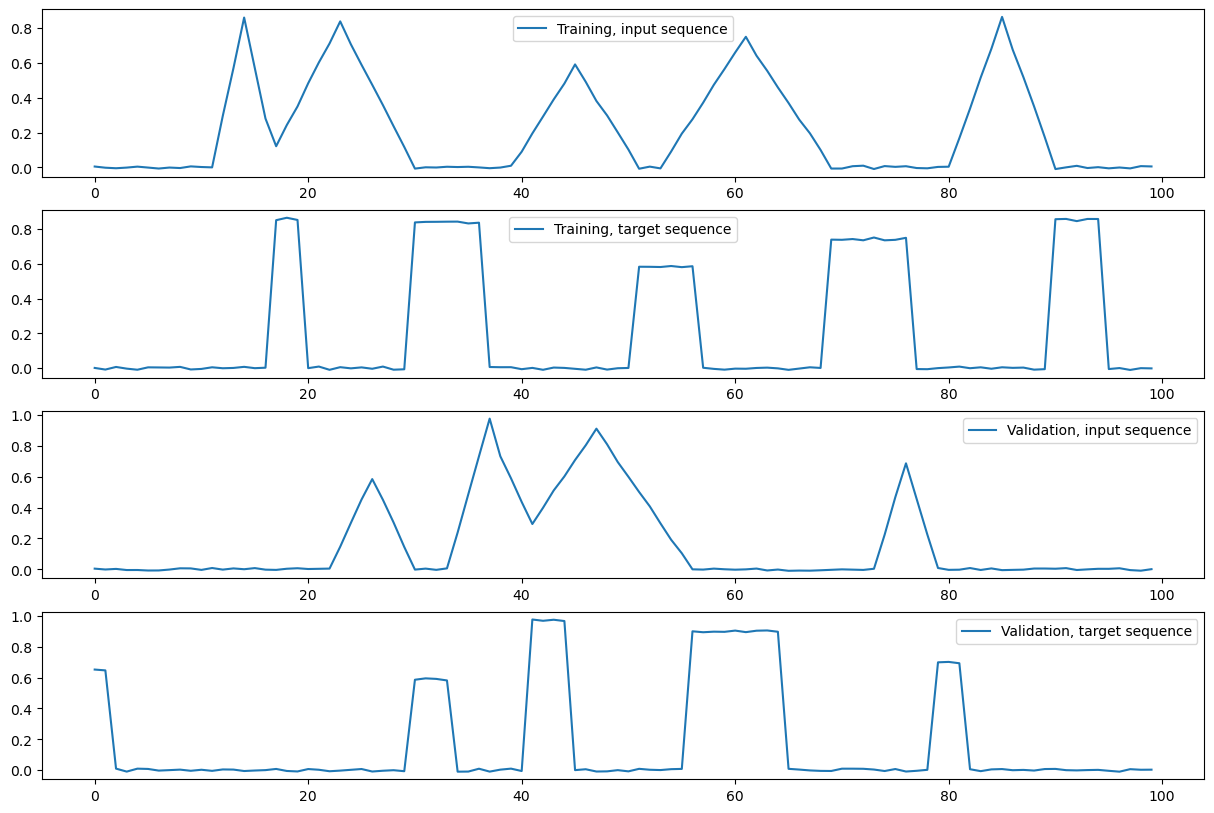

In [21]:
# Load data from files
x_trn,d_trn= np.load("pulsedata1-trn.npy")
x_val,d_val = np.load("pulsedata1-val.npy")


print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# If this is set to True, then we have the reverse problem. Input triangle pulse, target square puls.
if True:
    d_trn,x_trn = x_trn[:,::-1],d_trn[:,::-1]
    d_val,x_val = x_val[:,::-1],d_val[:,::-1]

ns,tlen = x_trn.shape
t = np.arange(tlen)

# The training / test case to look at
i = 3

# Plot
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(t,x_trn[i,:])
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,d_trn[i,:])
plt.legend(['Training, target sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,x_val[i,:])
plt.legend(['Validation, input sequence'], loc=0)

plt.subplot(4,1,4)
plt.plot(t,d_val[i,:])
plt.legend(['Validation, target sequence'], loc=0)


### CellName: Ex4-2 (#10)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Define the model and train
Here we are going to setup the model and train it. There are three different models to choose from: 
* SimpleRNN: Simple feedback weights where the output from a node is feeding back to itself. For several hidden nodes there are feedback weights to all other nodes in the layer.
* LSTM: The LSTM unit
* GRU: The GRU unit

The standard choice of activation function is *tanh*, but you can also test *relu*. When it comes to training this model we are going to use a possible truncated BPTT approach. The support in Keras for doing this is somewhat limited so here it is implemented manually. In short we have 500 training sequences and we define a mini-batch size *mb* that selects *mb* of these sequences to train using the normal stochastic gradient descent idea. Then we have a variable *batchlen* that is the length of the sequence to use in truncated BPTT. The default values for these are *mb=20* and *batchlen=50*. If you want to train without the truncated BPTT approach put *batchlen=100*.

During training we print the normalized training and validation error. Normalized means here that the loss (=MSE) is divided by the variance of the target signal. That means that a normalized error of 1 is poor, but below 0.1 (or so) the error is much smaller than the signal itself.

What you need to do in this cell is to define your model and train it.

In [30]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 20
batchlen = 50

# The network type
#net = SimpleRNN
net = GRU
#net = LSTM

# Number of hidden nodes
nh1 = 7

# This is only if you would like to add an additional hidden layer. See below.
nh2 = 5

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 50

# Start defining the model
nmb = ns//mb #number of minibatches
ntsteps = tlen//batchlen #number of truncated steps

#simpleRNN model with 5 hidden nodes in one layer. 
model = Sequential()
model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
model.add(net(nh2, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

model.add(TimeDistributed(Dense(1)))

adam = Adam(learning_rate=0.003)
model.compile(optimizer=adam,loss='mean_squared_error')
model.summary()

# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Calculation of Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Calculation of Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (20, 50, 7)               210       
                                                                 
 gru_14 (GRU)                (20, 50, 5)               210       
                                                                 
 time_distributed_14 (TimeDi  (20, 50, 1)              6         
 stributed)                                                      
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     16.59        0.92246     0.72781
2     10.10        0.65083     0.57222
3     10.28        0.49675     0.41846
4     10.10        0.41596     0.39091
5     10.06        0.38380     0.36485
6     10.11        0

### CellName: Ex4-3 (#11)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Plot the result
In this cell we just plot the result for one of the first *mb* (minibatch size) test sequences. You can select which of these ones by an index (see the code). Also, the last graph shows the hidden node activation for all of the hidden nodes. **Note:** For the GRU and simpleRNN models this is all of the hidden activity there is, but for the LSTM there is also the memory signal. That one is not shown!

### Questions
We are now finally at the point of asking questions. Whenever you define a new model and train it, you need to run the  cell below in order to show the result for the newly trained model. 

**Hint!** For all of the questions below you are going to train different models. Keep an eye on how the training error is developing. If you see large fluctuations, you may to change the learning rate. The default value of 0.003 should be OK for most trainings. 

#### Question 6
(Just to get started!) Define a simpleRNN model with 5 hidden nodes and train it for about 20 epochs. **What validation error do you obtain?** 

Hint 1: The validation error can be found during "training" as the error for the last epoch.<br>
Hint 2: You may have to train a couple of times to make sure that you did not end up in a "bad" local minima the first time.

#### Question 7
Test different models! Train the three different models (one hidden layer only) with the approximately the same number of trainable weights (around 150-200) and decide which of them that works best? **So, out of the three different models, *simpleRNN, GRU* and *LSTM*, which one worked best using the same number weights?**

#### Question 8
Interpretation! You are now going to interpret the hidden node outputs. Remember that the actual output for each time is a linear combination of the hidden node outputs. As said before you can see the hidden nodes output in the last plot. Note that the weights in the dense layer can have different signs so that hidden nodes outputs can be linearly combined with both positive and negatives signs. Train a *GRU* model with 3 hidden nodes for about 20 epochs. **Try to explain what the different hidden nodes are detecting**.

Comment: This is of course a question with no definite true answer. We just want you to interpret what the different nodes are doing.

#### Question 9
If you look at the top of cell *Ex4-1* you can, by changing False -> True, define the reverse problem (see top of the code cell). That is, input is the triangle pulse and target is the square pulse. This should be a more difficult problem! **Why?** **Present a RNN model that can "solve" this reverse problem (i.e. below 0.1 in test error).**

Hint: Here you can experiment with two hidden layers of LSTM/GRU/SimpleRNN nodes


1/1 [==============================] - 0s 54ms/step


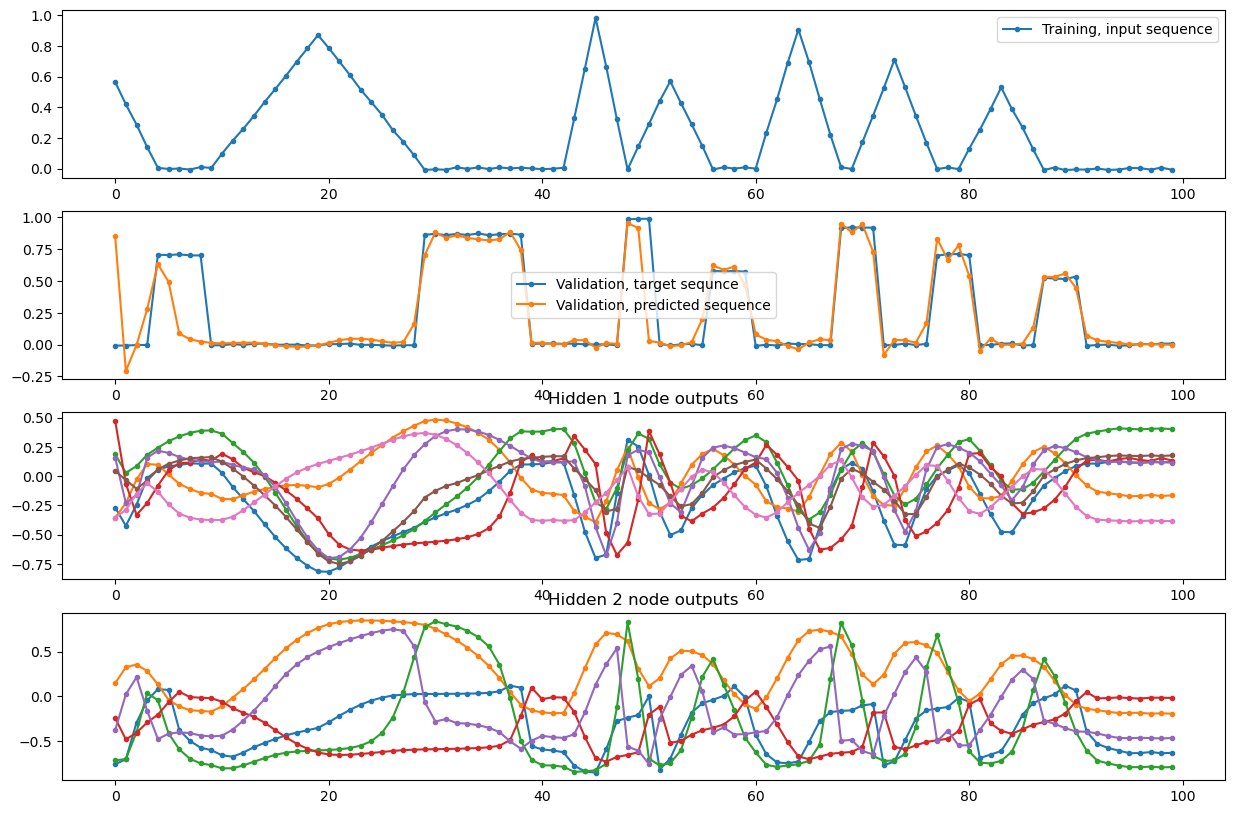

In [31]:
xshow = x_val[:mb]
dshow = d_val[:mb]
dout = np.zeros((mb,tlen))
hidden1 = np.zeros((mb,tlen,nh1))
hidden2 = np.zeros((mb,tlen,nh2))

rnn1 = model.layers[0]
rnn2= model.layers[1]

#dense = model.layers[-1]
#sign = K.sign(dense.layer.kernel)[None,None,:,0]
if len(model.layers) > 2 :
    intermediate = K.function([rnn1.input], [rnn1.output, rnn2.output ])
else :
    intermediate = K.function([rnn1.input], [rnn1.output])

for tstep in range(ntsteps):
    t1,t2 = tstep*batchlen,(tstep+1)*batchlen
    inp = xshow[:,t1:t2,None]
    if len(model.layers) > 2 :
        hi,hi2 = intermediate([inp])
        hidden2[:,t1:t2:,:] = hi2
    else :
        hi, = intermediate([inp])
    hidden1[:,t1:t2:,:] = hi
    yi = model.predict(xshow[:,t1:t2,None])
    dout[:,t1:t2] = yi[:,:,0]

t = np.arange(tlen)

# Selection of validation sequence, valid range is [0,mb]
i = 0

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.plot(t,xshow[i],'-',marker='.')
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,dshow[i],'-',marker='.')
plt.plot(t,dout[i],'-',marker='.')
plt.legend(['Validation, target sequnce', 'Validation, predicted sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,hidden1[i],'-',marker='.')
plt.title('Hidden 1 node outputs')

if len(model.layers) > 2 :
    plt.subplot(4,1,4)
    plt.plot(t,hidden2[i],'-',marker='.')
    plt.title('Hidden 2 node outputs')

# The report!

## Author
Joel Bengs
jo5531be-s@student.lu.se

## Introduction
This lab investigates the basics of Convolutional Neural Networks (CNN) and Recurrent Neural Networks (RNN).

A few CNN models are built; some that can classify handwritten digits, some that can classify simple shapes (circles, triangles, squares) and some that can classify variants of rectangles. The focus is on network architecture and the effect of filters and pooling.

With respect to RNN, a pulse converter is built using three different architectures. The SimpleRNN is a network where each hidden node has a recurrent weight to itself and every other hidden weight. The LSTM implements the Long Short Term Memory design, while GRU implements the General Recurrent Unit design.

## Answers to questions

#### Question 1
__Do you understand the network architecture?__
The network architecture is sketched in Figure 1. Important to remeber is that:
- each filter acts on all channels and outputs just one channel per filter (in other words, the filter has the same depth as the input to the filter).
- (max) pooling preserves channel depth. The pooling itself has depth one, and is applied independently to each channel to produce one new channel.
- We have dimension reducion in each step.

_Figure 1: The ANN in Q1._

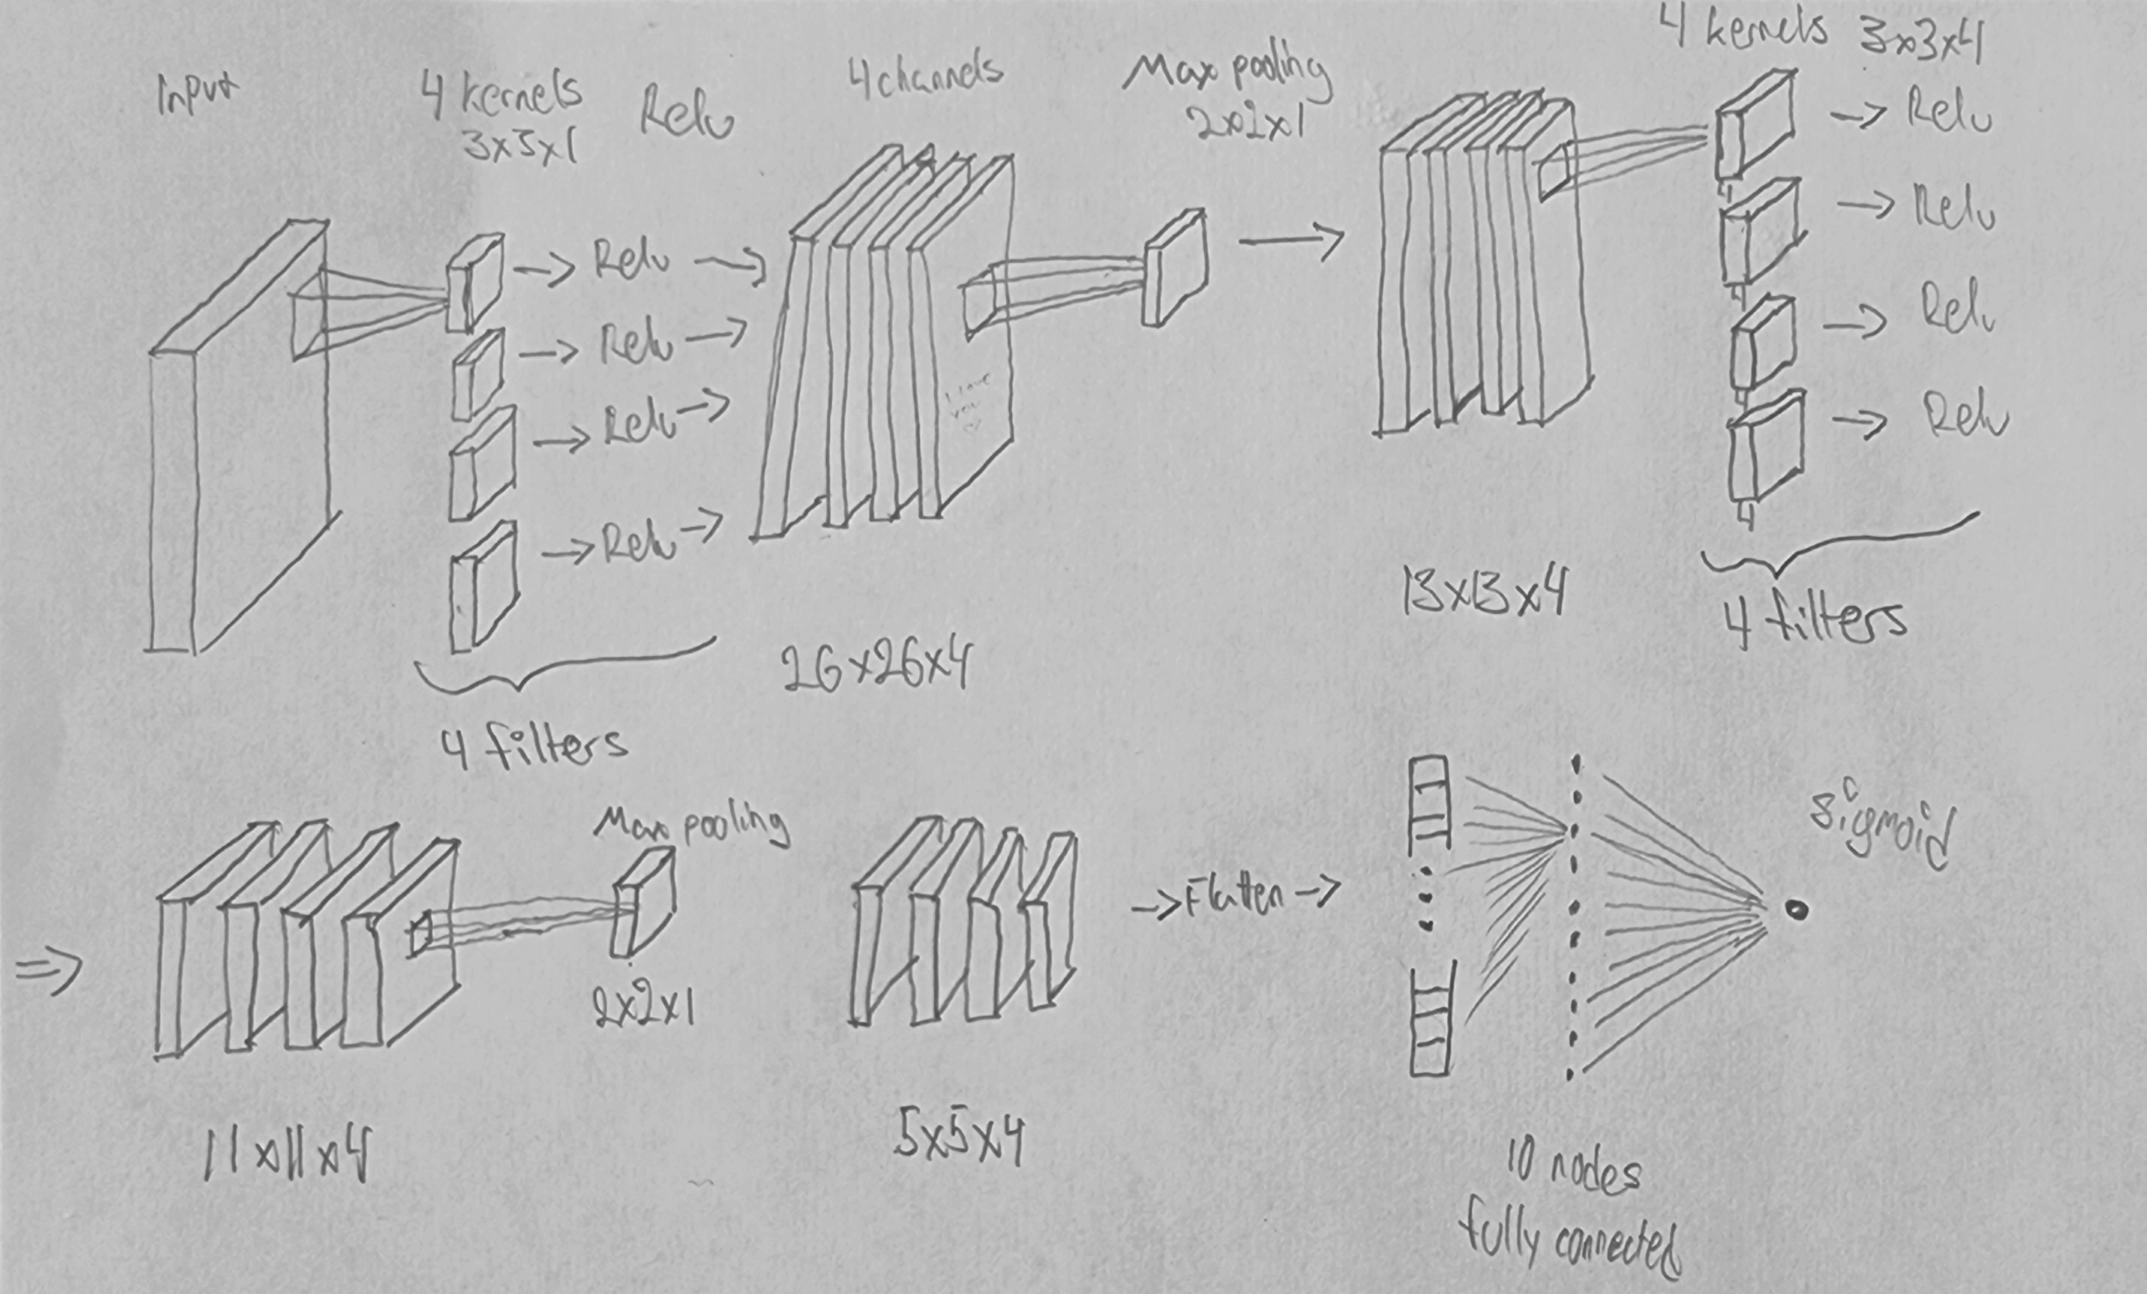

__What is your validation set performance in terms of the accuracy?__
The validation accuracy was above 99.78%. The network has 1209 trainable parameters.

#### Question 2
__How many parameters do you have in your trimmed model? What is your architecture?__
We know that the majoriity of trainable parameters occur in the MLP as it is fully connected. With 10 hidde nodes and a flat input of length 100, 10 x 100 + 10 = 1010 trainable weights occur. A resonable guess is to try to reduce the size of the MLP.

With 5 hidden nodes, the ANN had 699 paramenters orS which 505 came from the MLP. The validation accuracy was 99.66%.
With 3 hidden nodes, the ANN had 495 parameteres of which 303 came fromt he MLP. The validation accuracy was 99.33%.

Lastly, one filter was removed from each convultion step. This gave the model:
3 fitlers (3x3) -> Max Pool (2x2) -> 3 filters (3x3) - > Max Pool (2x2) -> Flatten (100) -> MLP (3 hidden nodes)
It reached an accuracy in validation of 98.2% with 346 trainable parameters. The losses decreased slower than before but eventually reached the same levels, see Figure 2.

A substaintialy smaller network could perform equally good!

_Figure 2: The optimal model in Q2_
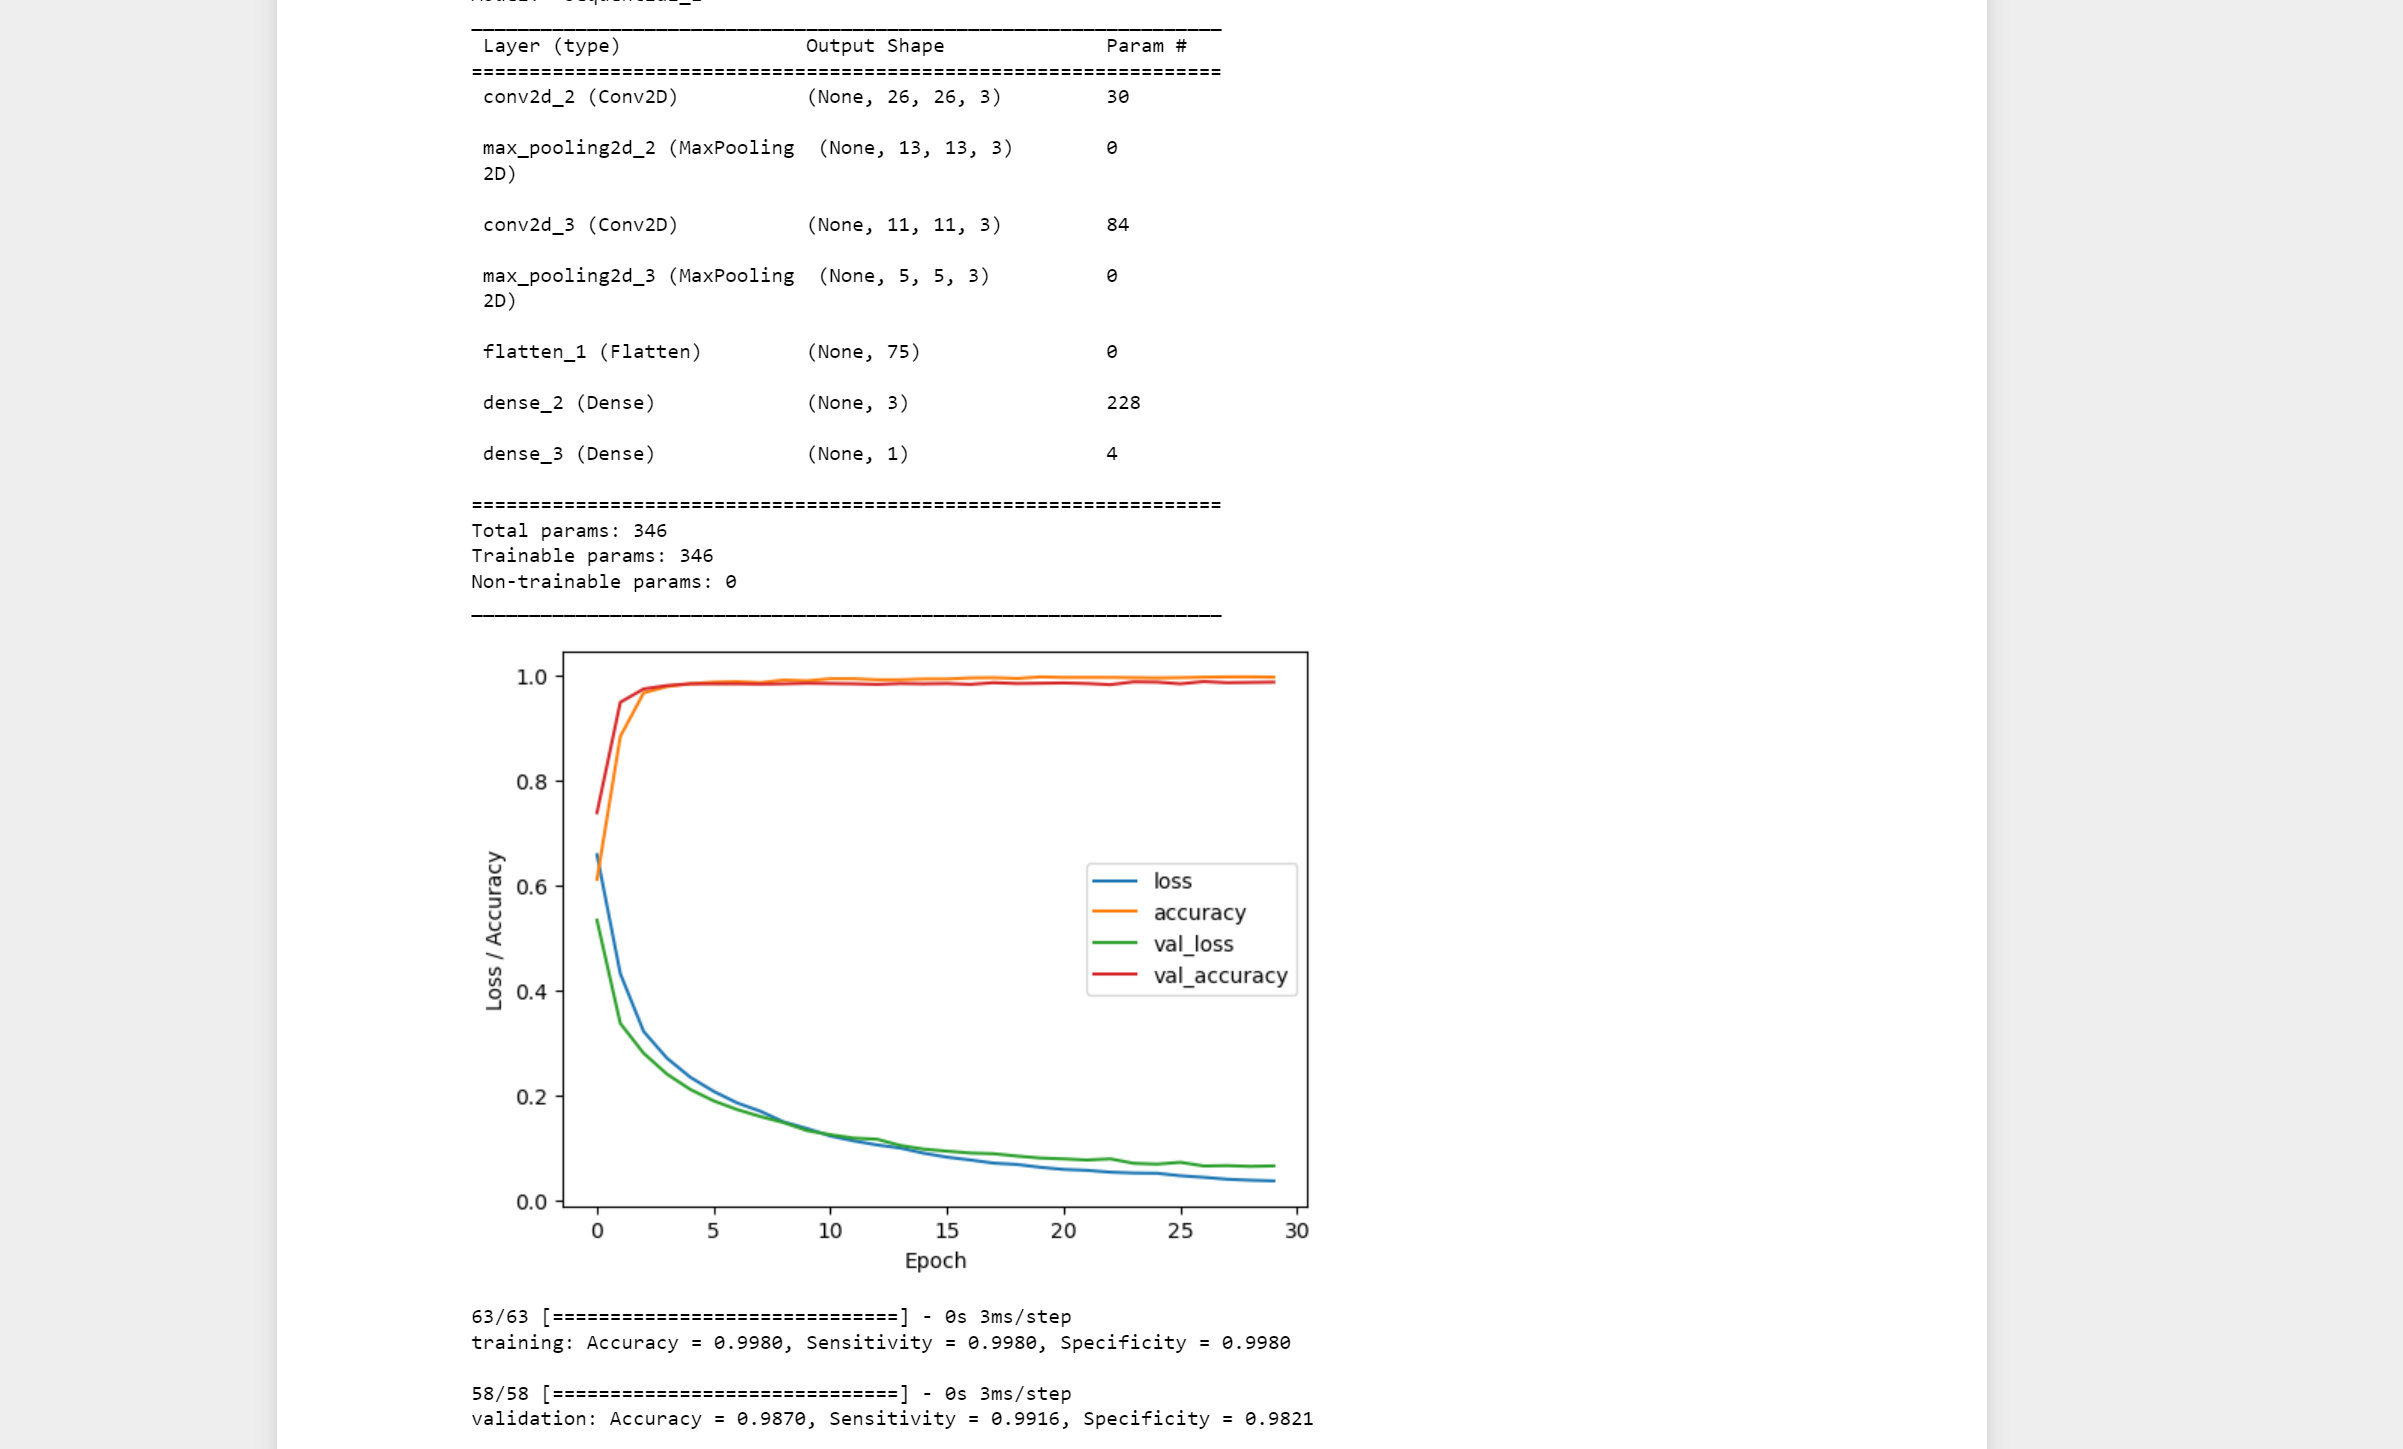

#### Question 3
__Can you find and describe some property in the filters that makes sense when it comes to separating "5" from "6"?__

With the model from Q2, the following can be said when interpreting the visualization of the kernels.

The first convolutional layer:
1. The first kernel finds horizontal lines.
2. The second kernel might focus on vertical lines without completely discriminate other shapes. On the other hand, the "veritcal lines" identified were acctualy the brightest pixels in the input. So rather, the second kernel dampens the brightness of the entire input and blures it out.
3. The third kernel highlights contrasting areas, where white meets black. Areas of solid colors are suppressed.

The second convultional layer:
1. No clear pattern.
2. The second kernel uses black pixels to somewhat outline the digit. It seems that for the 5, the dark void inside the upper and lower loops are important. For the six, the abscence of these dark voids are important.
3. The third kernel seem to focus on the location on the location of the brightest pixel. A 5 has its center of gravity higher up, while a 6 has it lower.

#### Question 4
__Provide the details of your CNN model for the CRT problem and present the validation result.__

For the first problem, we have three distinct shapes. The problem is not far from that of 5's and 6's, but with three categories. It would be resonable to start with the same architecture as the smallest version form Q2: 3 filters (3x3, relu) -> MaxPool (2x2) -> 3 filters (3x3, relu) -> MaxPool (2x2) -> Flatten -> MLP -> 3 output nodes. This model is called model A and could reach convergence but only at 87% accuracy.

_Figure 3: Model A for Q4_

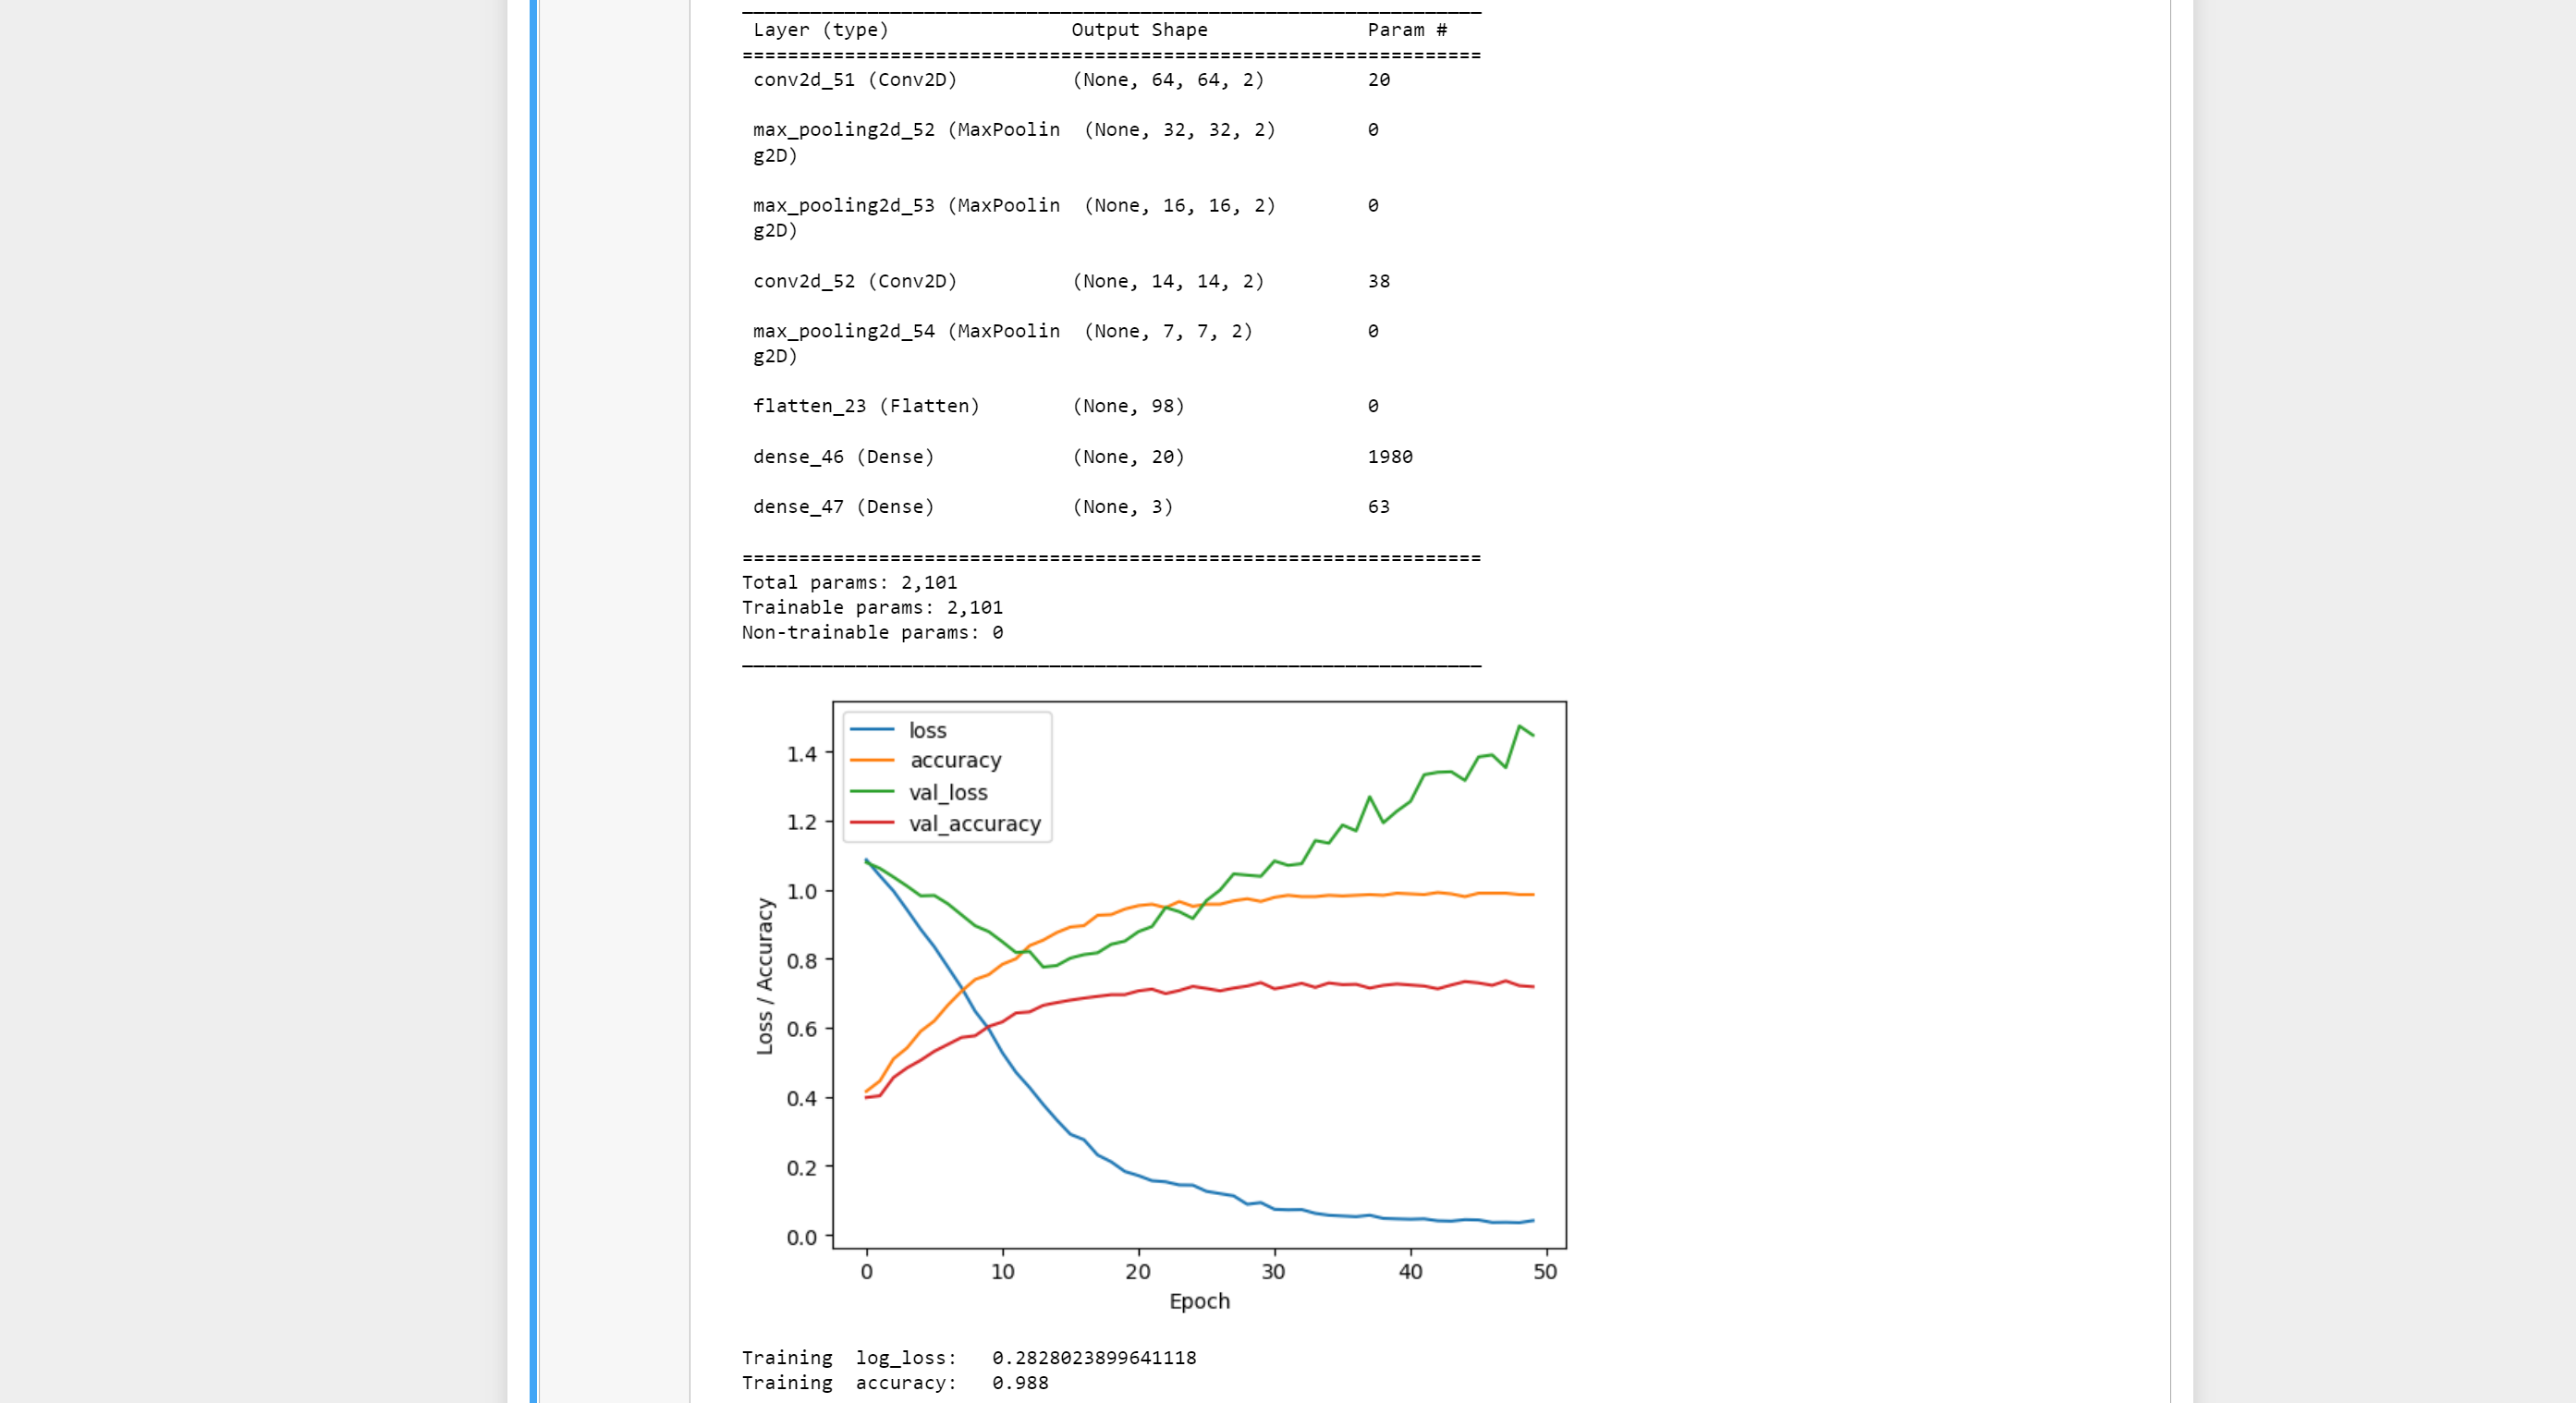

Model A had a flatten output of length 588, which resulted in a lot of weights in the MLP. Data reduction is needed, and one way is to use stride = 2. The result is presented in Figure 4. Model B has only 210 trainable parameters.

_Figure 4: Model B for Q4, with stride 2_

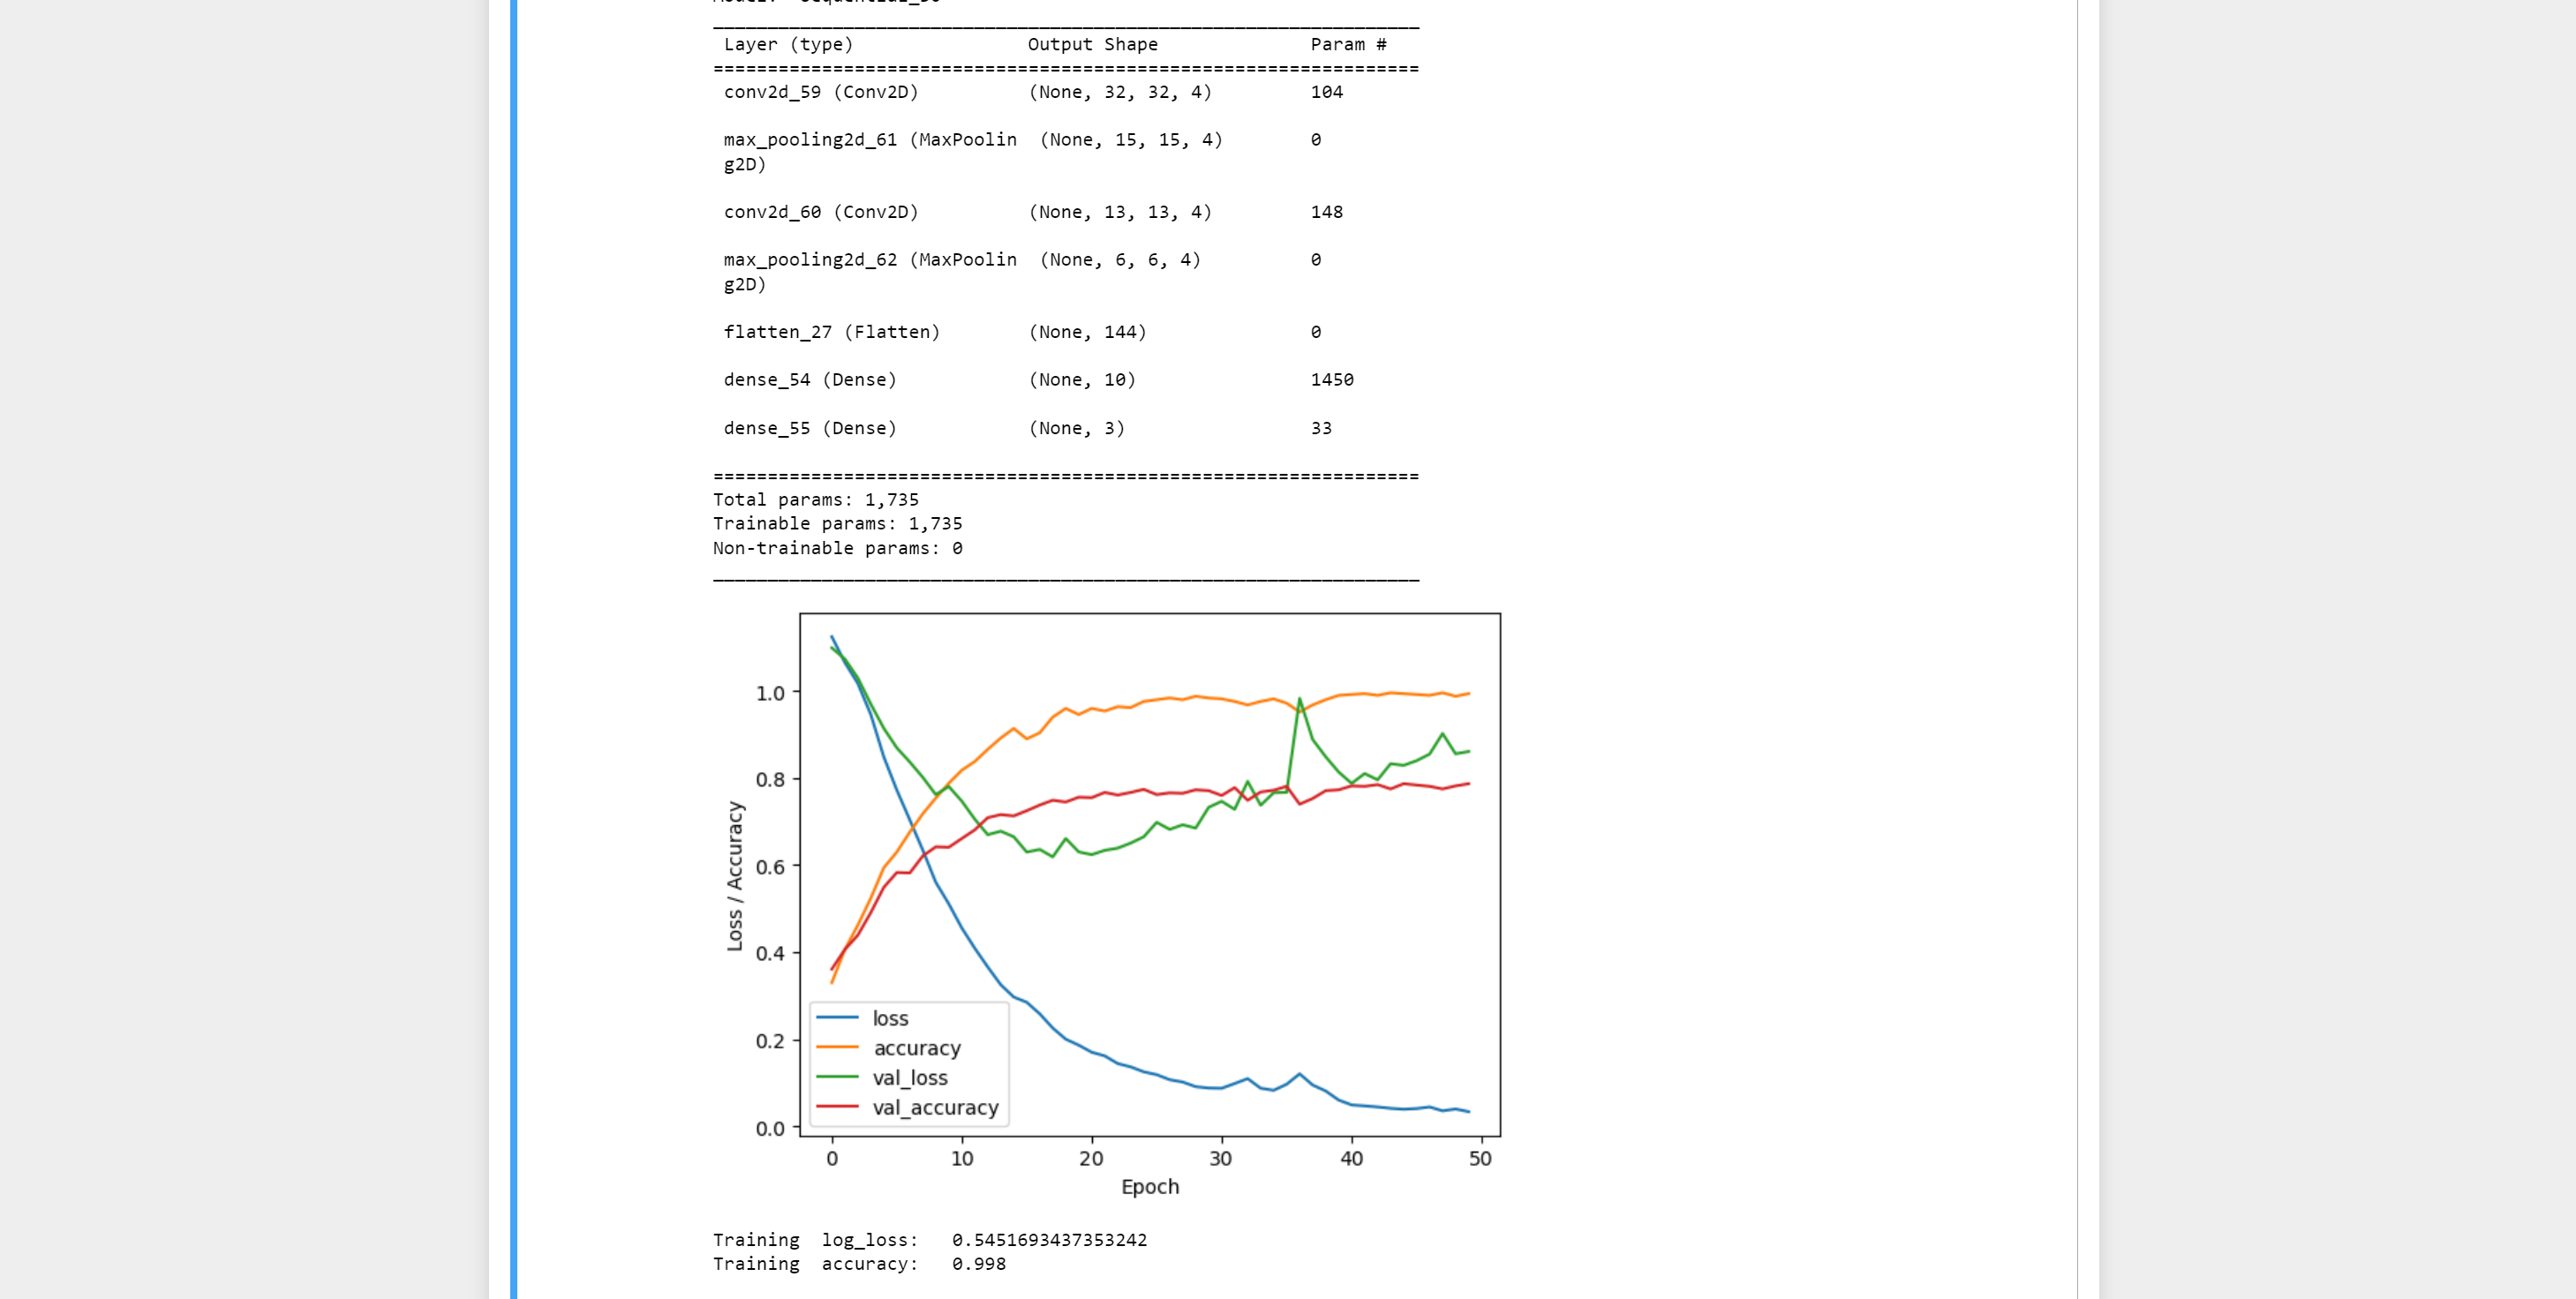

One more filter was added in each conv layer. Then the size of the MLP was then increased to 5 hidden nodes. Performance was still not at 95% validation accuracy. Using the visualization of filter outputs, it was realized that the strides probably did too much data reduction because e.g. a rectangle were only presented by two pixels after the CNN. Therefore the stride in the second convolutional layer was reduced to 1, resulting in model C as per Figure 5.

_Figure 5: Model C for Q4_

_(Image overwritten by mistake)_

The model has good performance, but can be further improved. Padding was added in the first conv layer to achieve symetric tensors. Studying the visualization of the filters, I had a feeling that the focus should be more on the orientation of the brightest pixels in relation to each other and less on location, because input shapes could have very different sizes. Therefore the kernel on the first max pooling layer was increased to 3x3. This reduced the trainable parameters to almost half. Model D is the final model of Q4, with 96% validation accuracy and 531 trainable parameters.

_Figure 6: Model D for Q4_

_(Image overwritten by mistake)_

#### Question 5
__Provide the details of your CNN model for the R3 problem and present the validation result.<br>
Why is this a more difficult problem than Question 4?__

This problem is more difficult because the patterns are very similar. Filters that identifies vertical or horizontal lines can not differentiate the patterns as they all include these features. The spacial relations become more important.

In model selection, I relied heavily on the vizualisation of filter outputs to try to build a CNN that could output a small grid (such as 3x3), preserving the spacial relation of the input patterns. This proved difficult.

When making the MLP larger (20 nodes -> 4k parameters), the validation loss diverged without validation accuracy improving.

After many attempts with small kernels, I took inspiration from the examples in the article "the-9-Deep-Learning-Papers-You-Need-To-Know-About" and increased kernel size and padding for both filters and pooling. This eventually resulted in the following model, with 78.9% validation accuracy using 1700 trainable weights. It has an alarming validation loss. The architecture was:

1. 4 filters (5x5, stride 2, padding='same')
2. Max Pooling (4x4, stride 2)
3. 4 filters (3x3)
4. Max Pooling (2x2)
5. Flatten
6. MLP with 10 nodes

_Figure 7: The final model for Q5_

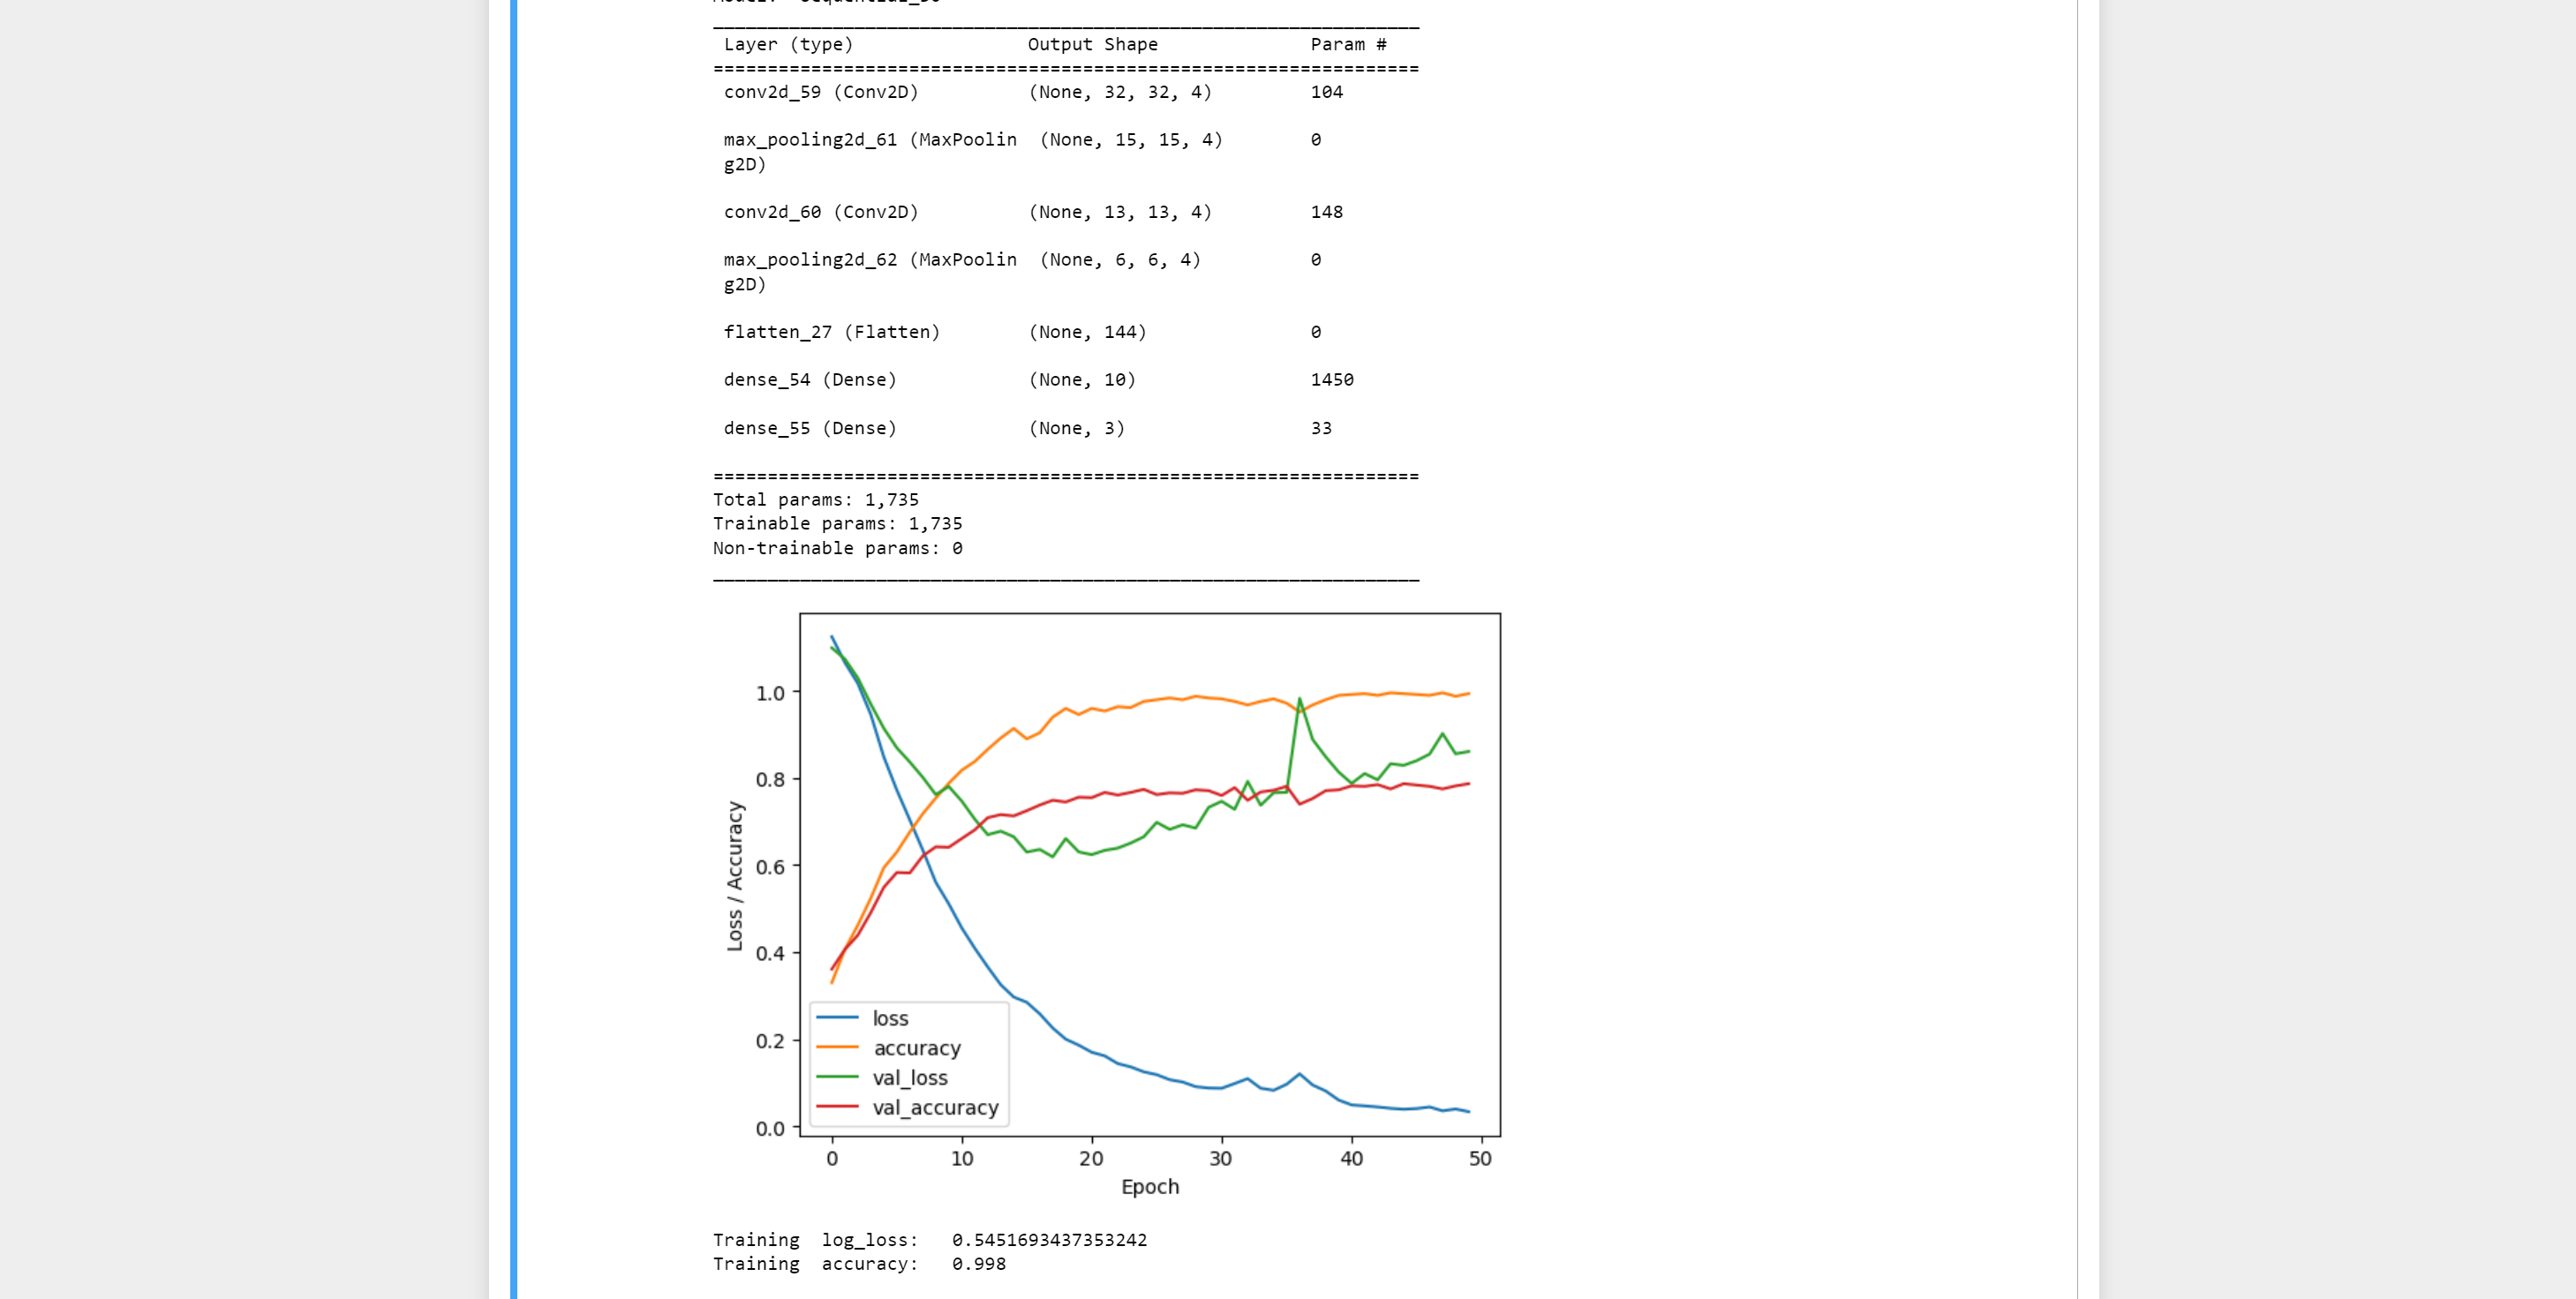
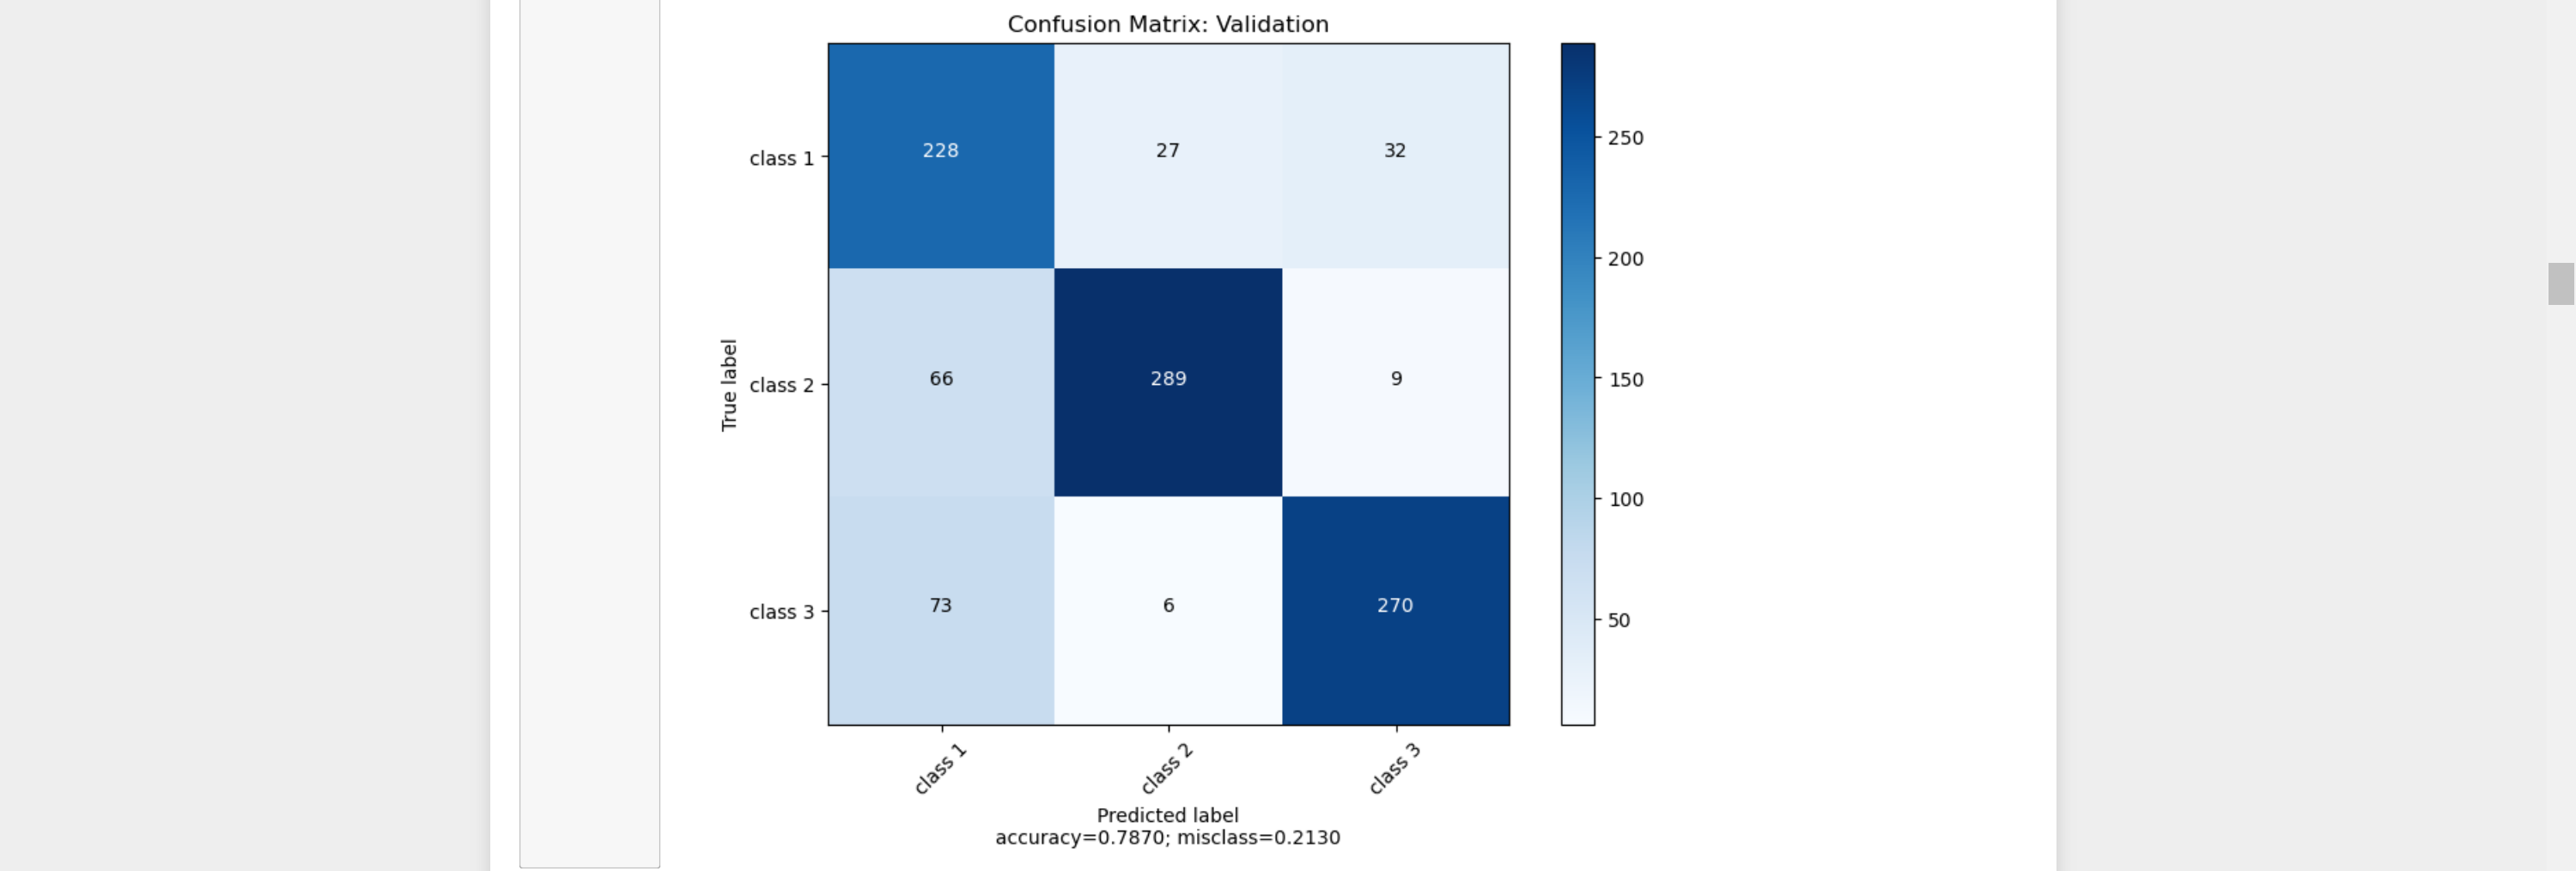

#### Question 6
__What validation error do you obtain?__

Training three models, the best validation error obtained with a simpleRNN model with 5 hidden nodes was around 0.42.

#### Question 7
__Present three different models, *simpleRNN, GRU* and *LSTM*, using roughly the same number weights.<br>
Which one worked best?__

Each model was run trained three times and the best results are as follows:

1. SimpleRNN: 0.42 validation loss.
2. GRU: 0.036 validation loss. Very good!
3. LSTM: 0.05 validation loss. Also very good!

Both the LSTM and the GRU models outperformed the simpleRNN.

#### Question 8
__Try to explain what the different hidden nodes are detecting. *Comment: This is of course a question with no definite true answer. We just want you to interpret what the different nodes are doing.*__

Below is a GRU with 3 hidden nodes and a validation loss of 0.18. The orange nodes seems to have a very large influence on the output as compared to the other nodes. The orange node has identified the translation of amplitude. The green and blue nodes seem to focus more on the speed of change and duration of pulses.

_Figure 8: The GRU model with 3 nodes._

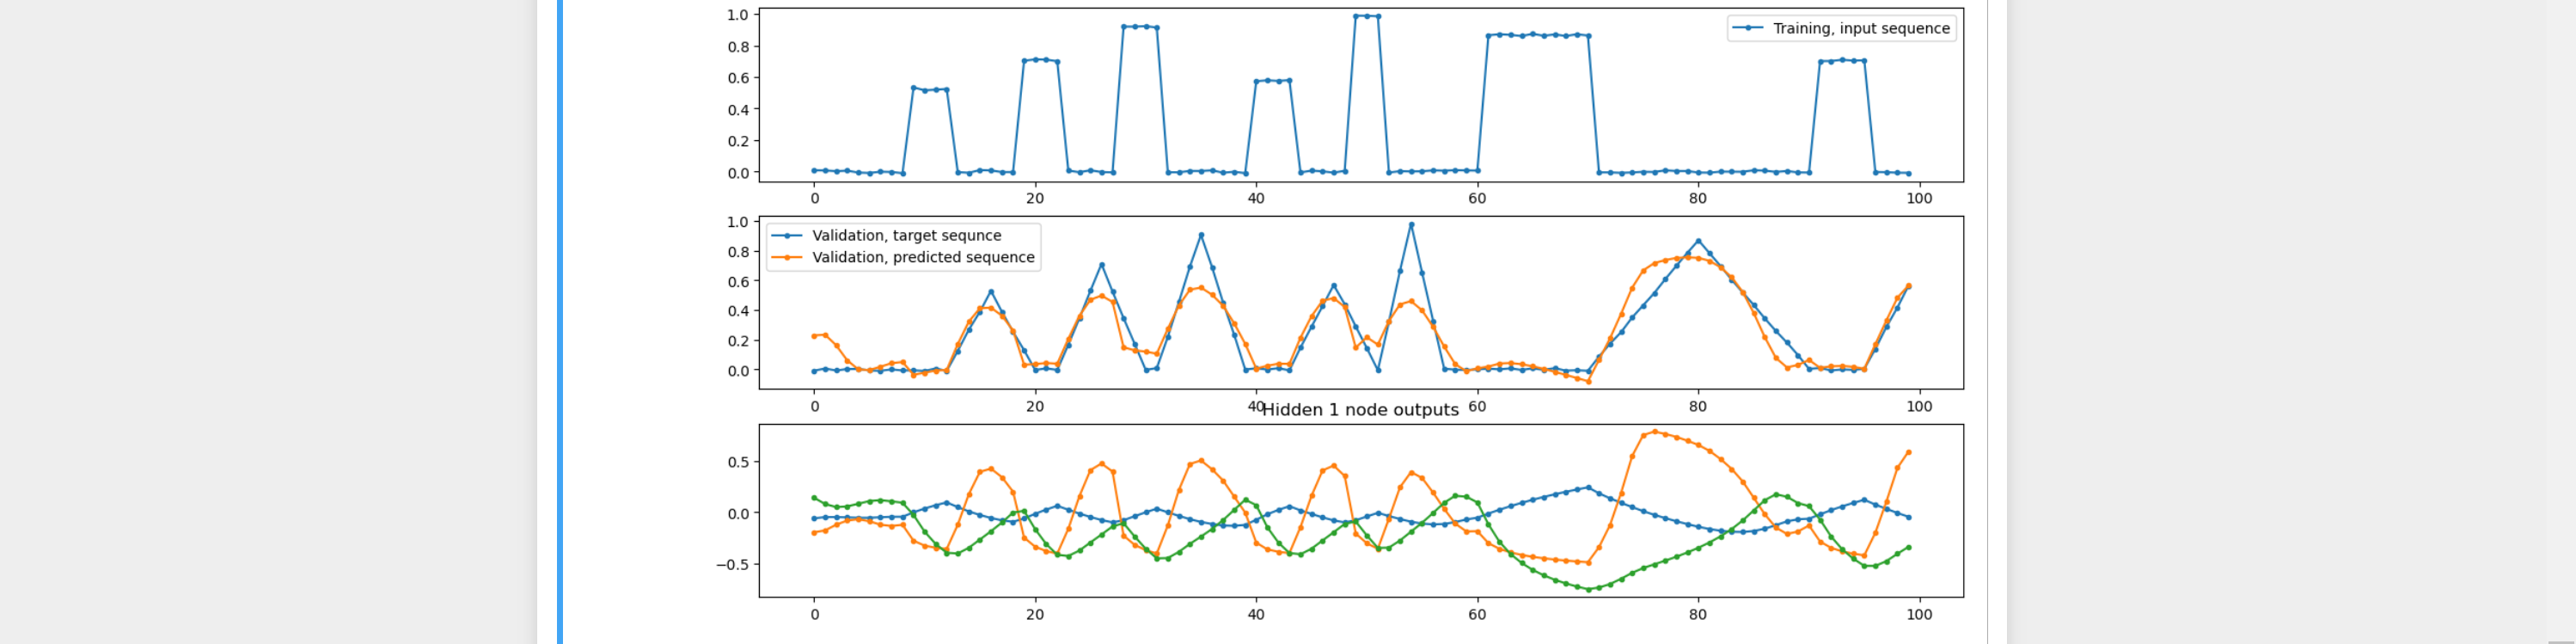

#### Question 8 bonus
Below are the visualizations of the three models when they reched their respective best performance in Q7, all with 5 hidden nodes.

SimpleRNN:
The pruple and red node seem to work together, while green and blue are a pair. Everytime the input engages, the purple/red increases directly while the green/blue compensates. Then the green/blue slowly catches up to the purple/red for the duration of the input pattens peek. This could mean that the purple/red somehow is a trigger for any starting point and amplitude, while the green measures duration. Once the input ends, purple/green/blue dives to negative and this triggers the ouput signal. The orange seem redundant.

_Figure 9: The SimpleRNN model with 5 nodes_

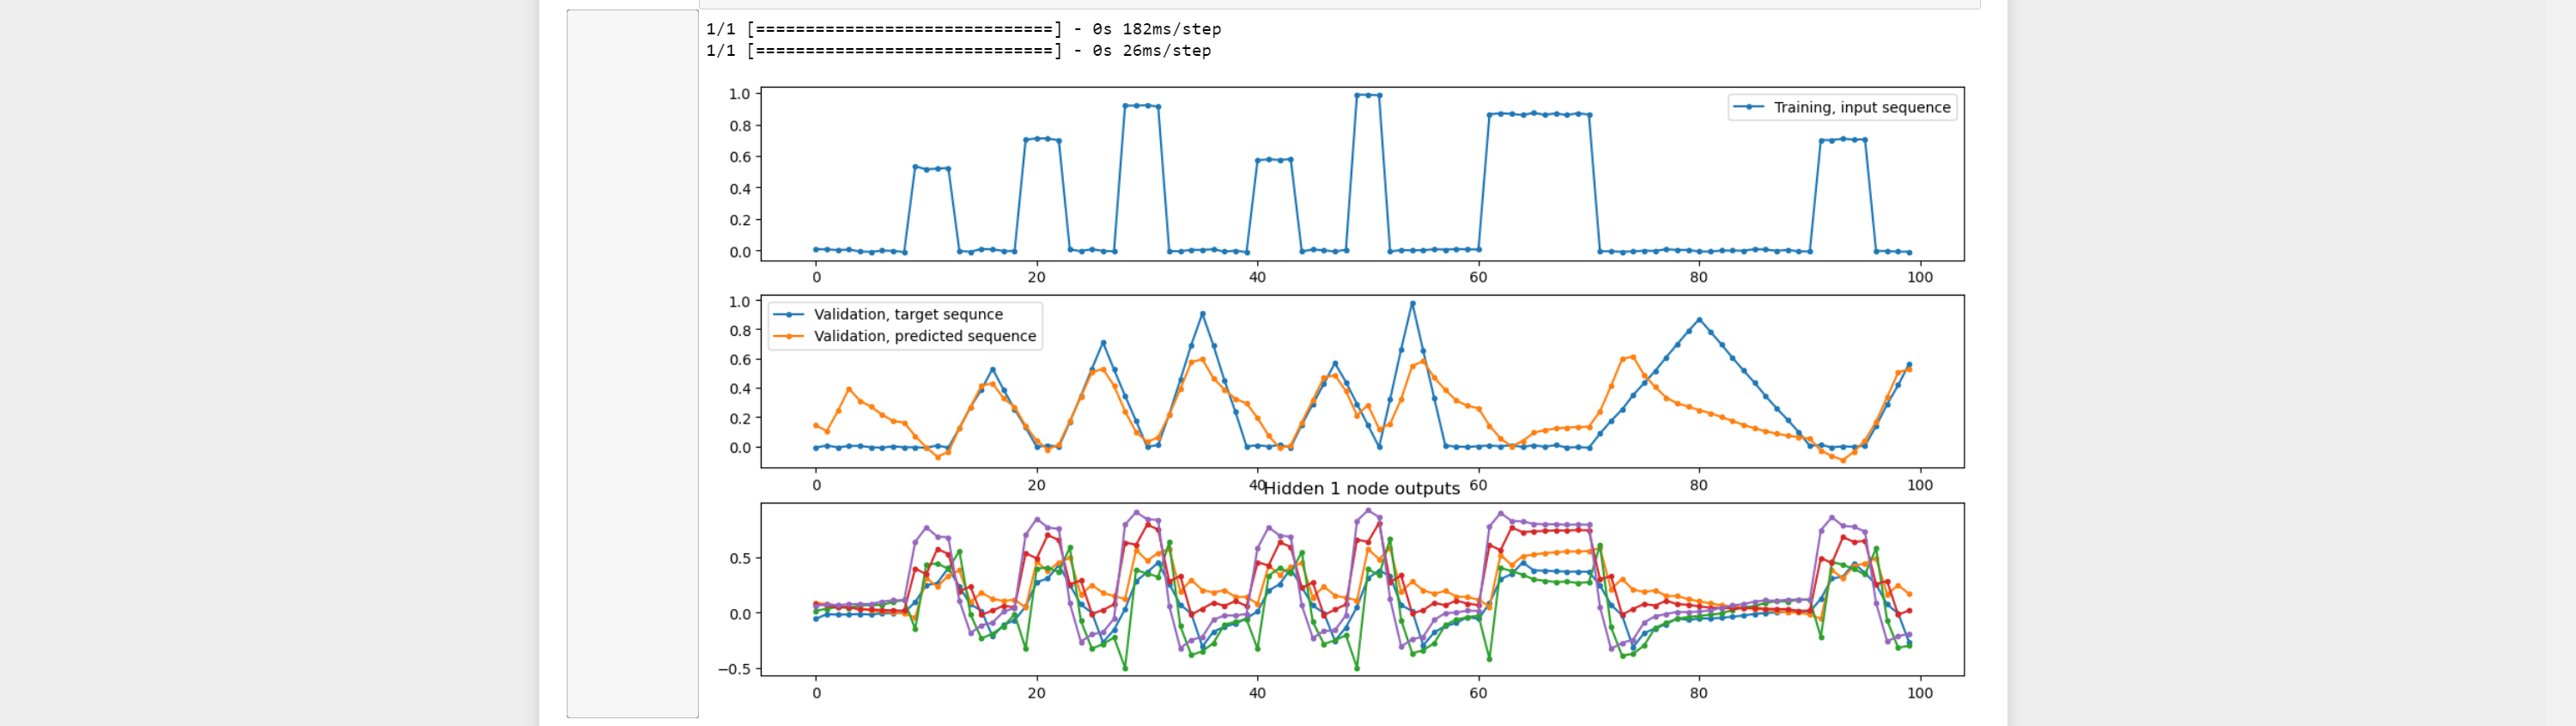

GRU: Blue and green nodes are inversely related and both trigger directly on input patterns. The identify start and end points, but not amplitudes. The red node seem to identify amplitudes in the input signal and transfer these amplitudes to the output. The purple and orange nodes are more volatile. One interpretation is that they identify the duration of signals. They have learned that the last peek must have a longer duration and thus a slower climbing rate.

_Figure 10: The GRU model with 5 nodes_

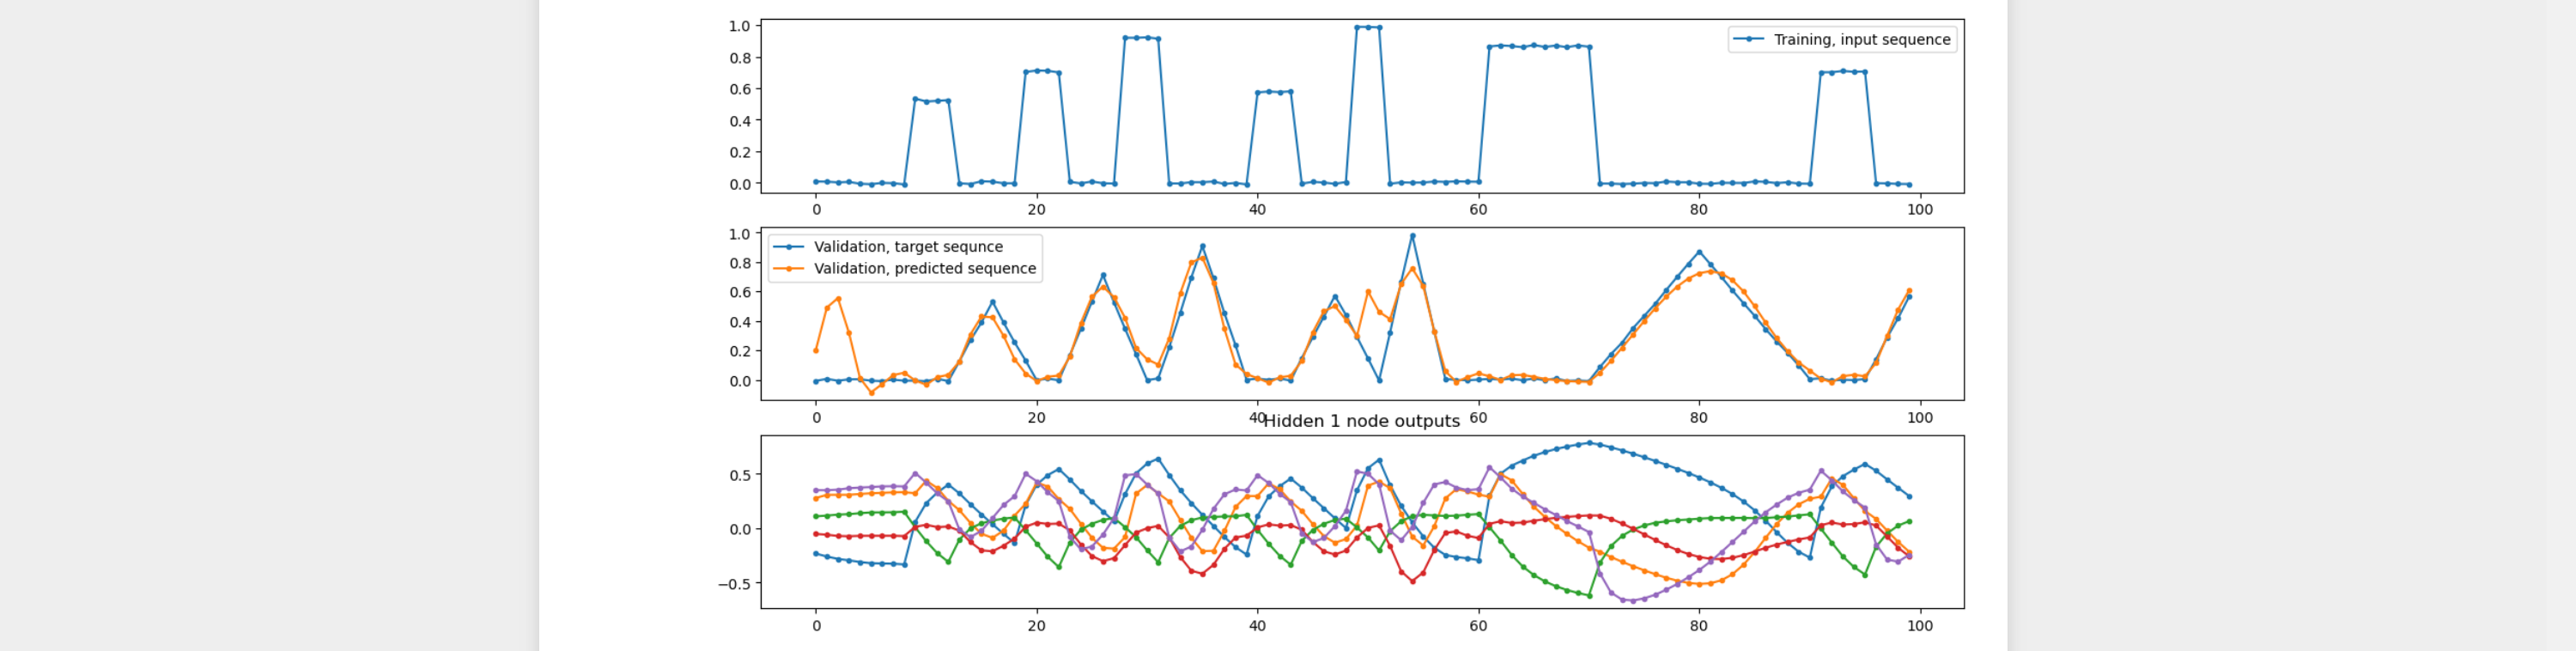

LSTM: In the LSTM model, the blue/purple and red/gren nodes work in pairs. The blue/purple have learned that square input translates to triangle outputs. They have however not learned to delay the signal enough. The orange node seem to handel delays, as it is the deviating one in the last output peek. The red/gren are harder to intepret as they are so smooth. Perhaps they smooth out the ouput.

_Figure 11: The LSTM model with 5 nodes_

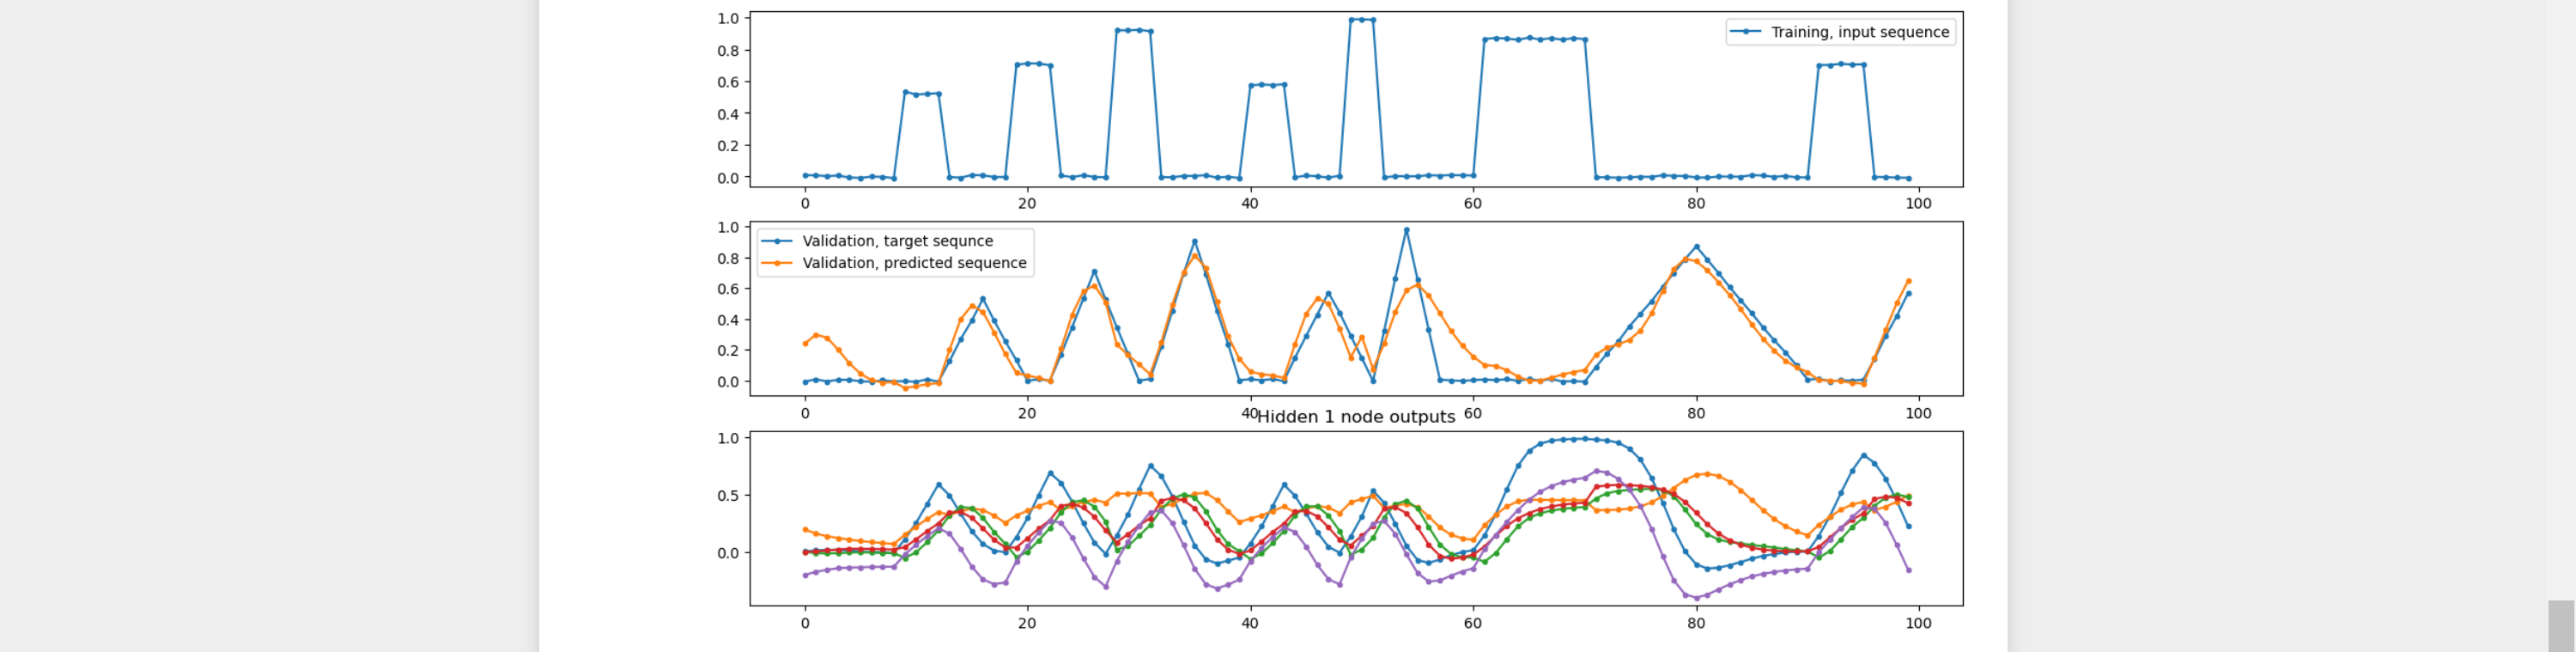


#### Question 9
__Why is the reverse of the pulse problem (input signal and target signal change roles, time is reversed) more difficult? <br>
Present a RNN model that can "solve" this reverse problem (i.e. below 0.1 in test error).__

This problem is more difficult because the target is more volatile - the derivatives of the outputs are very high. For the network to output such a high rate of change, weights have to be high. This is unstable and more difficult to solve.

Nine models were trained to solve the task, as per Table 1. The smallest model that could reach a normalized MSE < 0.1 was the GRU design with 13 hidden nodes in two layers (8 + 5), with tanh activation, optimized over 50 epochs.

| Model | # Nodes | # layers |   epochs | act.fun | Val. MSE |
|------:|--------:|---------:|---------:|--------:|---------:|
| GRU | | 3       |     1    |   20     |    tanh | 0.5 |
| GRU | | 5       |     1    |   20     |    tanh | 0.35 |
| LSTM| | 5       |     1    |   20     |    tanh | 0.38 |
| GRU | | 10      |     2    |   20     |    tanh | 0.2 |
| GRU | | 10      |     2    |   40     |    tanh | 0.1007 |
| GRU | | 10      |     2    |   50     |    tanh | 0.1006 |
| GRU | | 10      |     2    |   40     |    relu | 0.27 |
| LSTM| | 10      |     2    |   20     |    tanh | 0.104 |
| GRU | | 13 (8+5)|     2    |   50     |    tanh | 0.088 |

<center>
    Table 1: Models trained to solve the reverse pulse problem
</center>

_Figure 12: The final model for Q9_

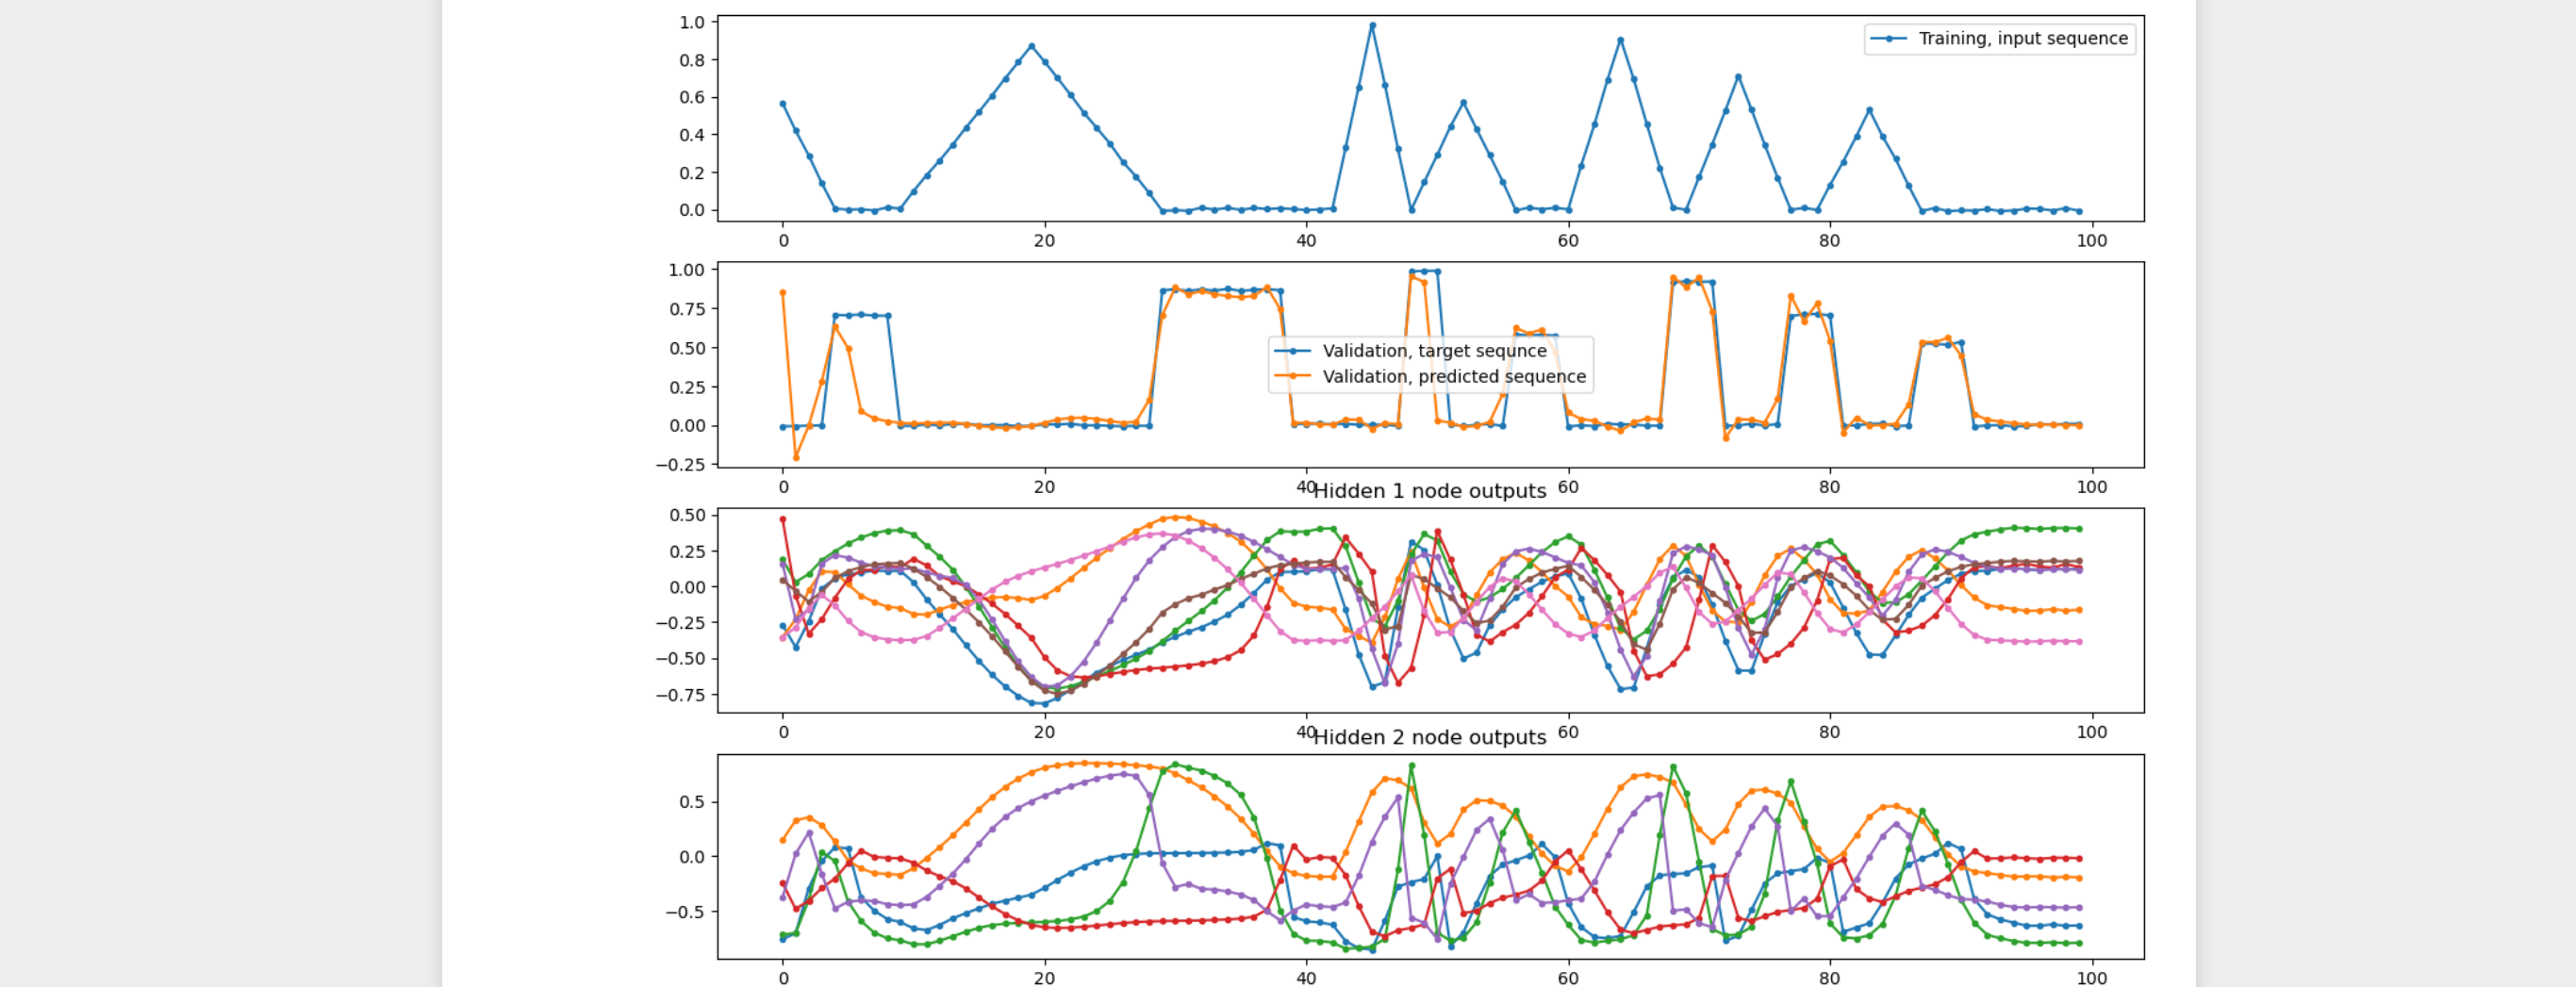

## Summary
Through the lab I have applied CNN and RNN basics to successfully solve a set of problems. 

The vizualisation of filter outputs in the CNN model provided valuable learnings when the models were small, but became more difficult to interpret when building larger or deeper networks. It was harder to understand how a network worked with spacial relations (the rectangle problem) that to understand when a filter identified a feature (such as a vertical line anywhere).

It is evident that the LSTM and GRU designs outperformed the SimpleRNN in identifiing time-dependent patterns. With truncated BRTT, they are equally fast in training.

A CNN model has a harder time differentiating classes that share major features, such as rectangles or digits that are very similar. It is more difficult to build a RNN model that can learn a target patter if that pattern is more volatile.